### 주택 가격 예측 (House Price Regression)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

# 경고문 미표시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터프레임 표시 제한 설정
pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

### 데이터 불러오기

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
data = housing['frame']
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Fireplaces  \
0          2003     Gable  CompShg     VinylSd     VinylSd  ...          0   
1          1976     Gable  CompShg     MetalSd     MetalSd  ...          1   
2          2002     Gable  CompShg     VinylSd     VinylSd  ...          1   
3          1970     Gable  CompShg   'Wd Sdng'   'Wd Shng'  ...          1   
4          2000     Gable  CompShg     VinylSd     VinylSd  ...          1   

   FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageArea  \
0          NaN     Attchd      2003.0          RFn          2        548   
1           TA     Attchd      1976.0          RFn          2        460   
2           TA     Attchd      2001.0          RFn          2        608   
3           Gd     Detchd      1998.0          Unf          3        642   
4           TA     Attchd      2000.0          RFn          3        836   

  GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA           Y          0           61              0   
1         TA         TA           Y        298            0              0   
2         TA         TA           Y          0           42              0   
3         TA         TA           Y          0           35            272   
4         TA         TA           Y        192           84              0   

   3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  MiscVal  MoSold  \
0          0           0        0    NaN   NaN          NaN        0       2   
1          0           0        0    NaN   NaN          NaN        0       5   
2          0           0        0    NaN   NaN          NaN        0       9   
3          0           0        0    NaN   NaN          NaN        0       2   
4          0           0        0    NaN   NaN          NaN        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 81 columns]

### 변수 유형 구분

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# 숫자형
numerics = [col for col in data.columns if data.dtypes[col] != 'object']
print(numerics)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [6]:
numerics.remove('SalePrice')
numerics.remove('Id')
print(numerics)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [7]:
# 범주형
categoricals = [col for col in data.columns if data.dtypes[col] == 'object']
print(categoricals)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### 숫자형 변수의 데이터 확인

In [8]:
data[numerics].describe()    

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

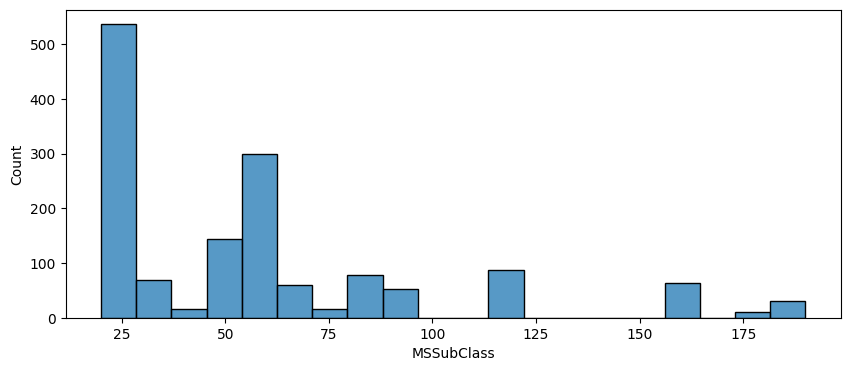

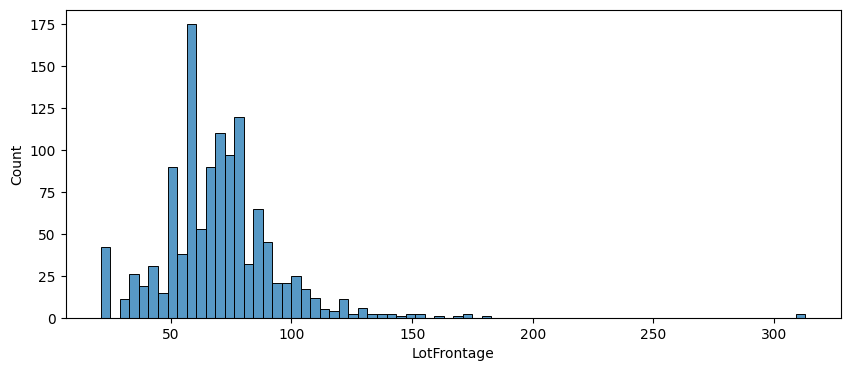

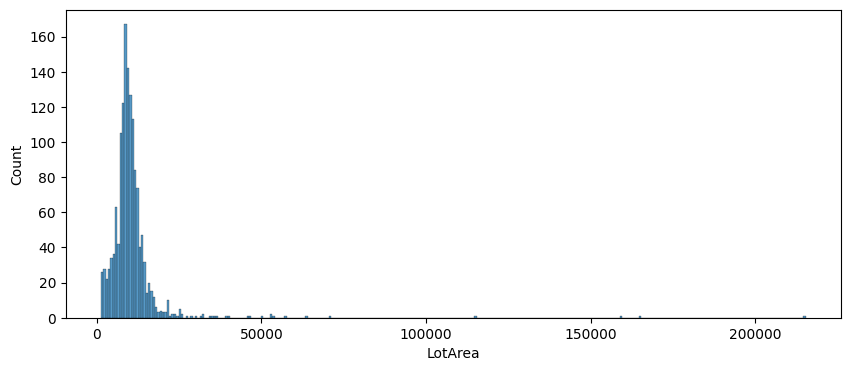

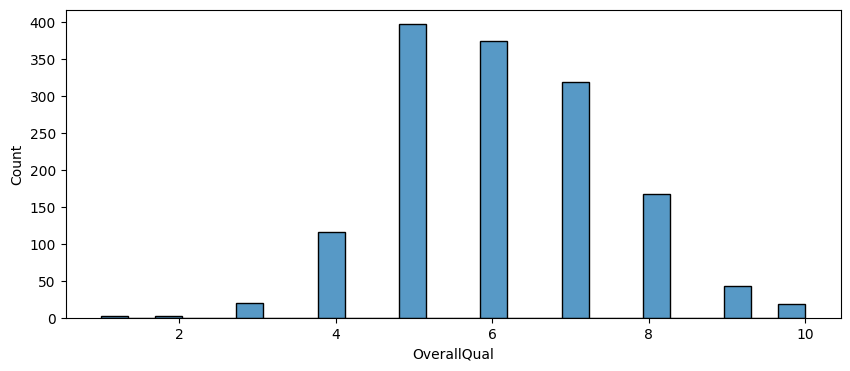

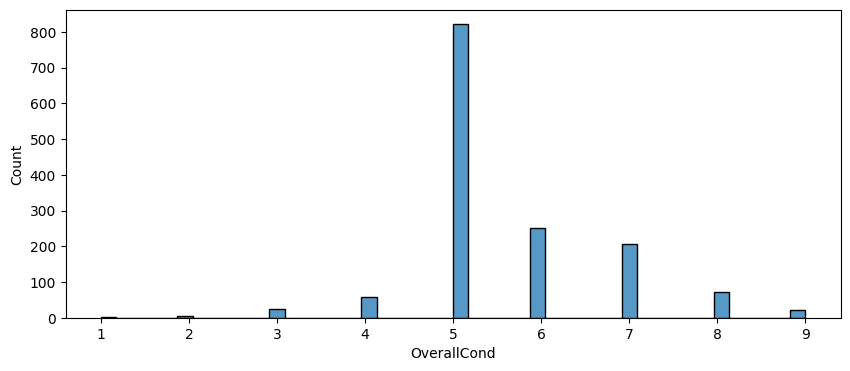

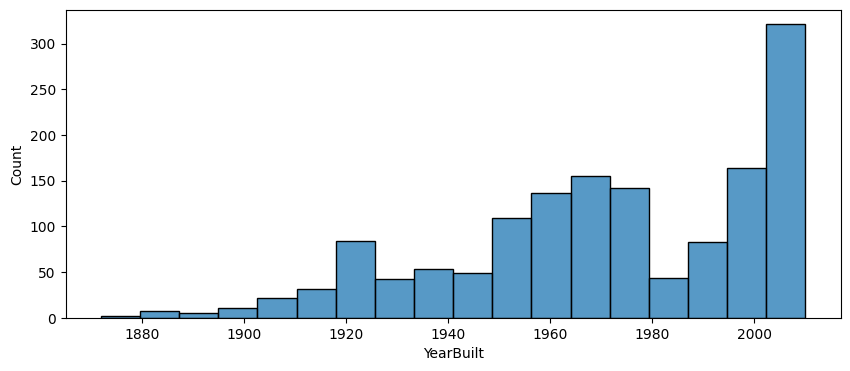

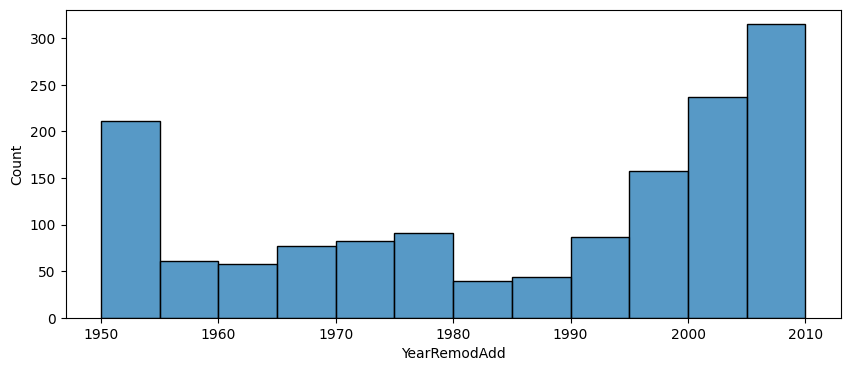

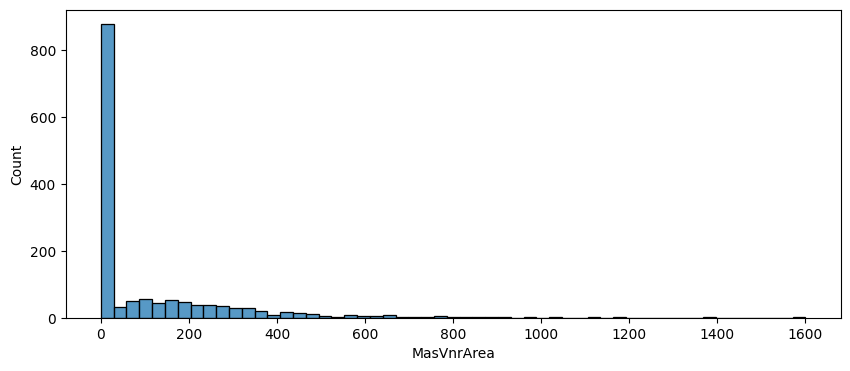

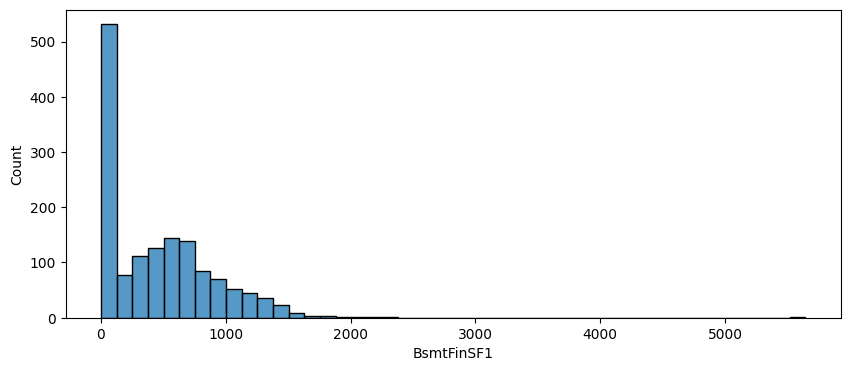

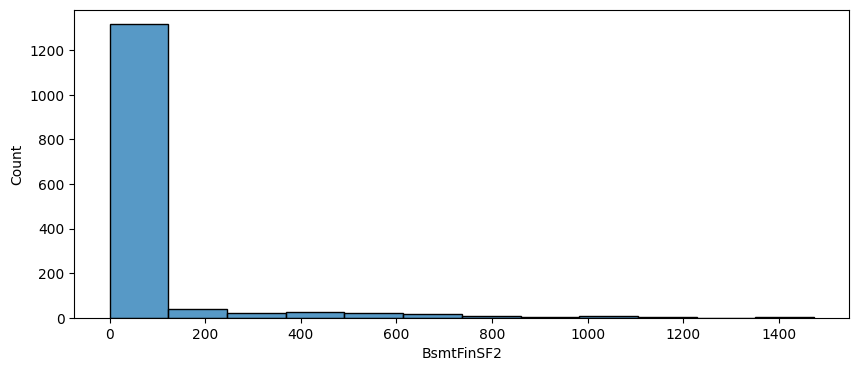

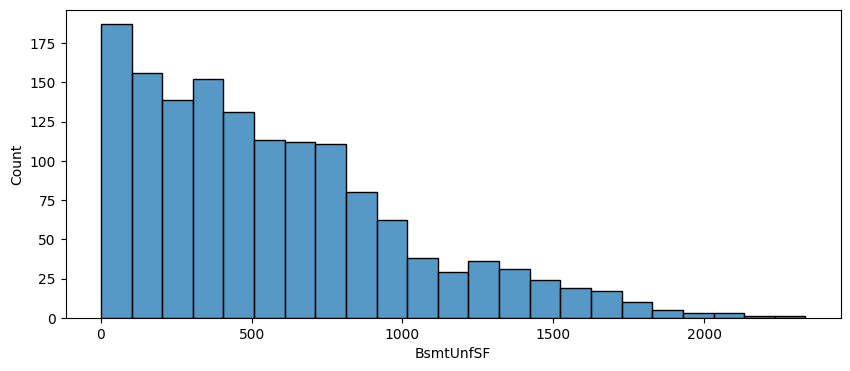

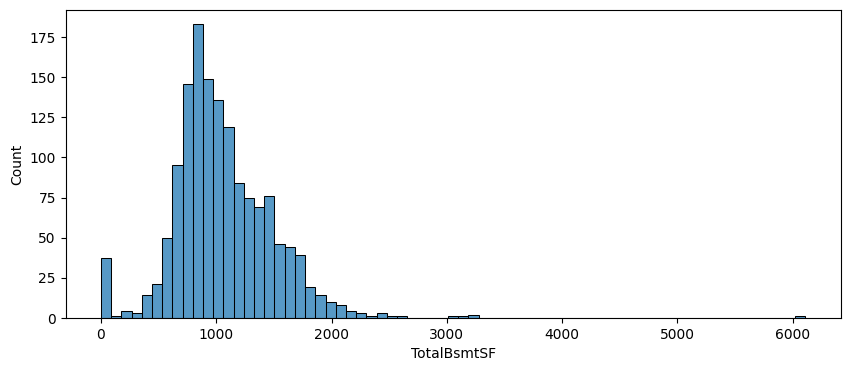

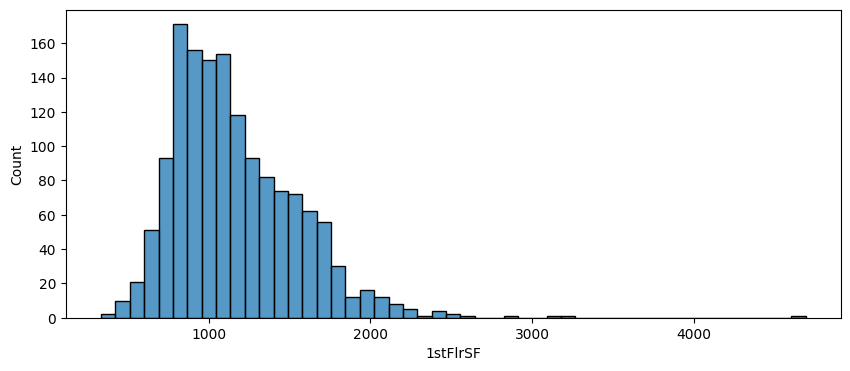

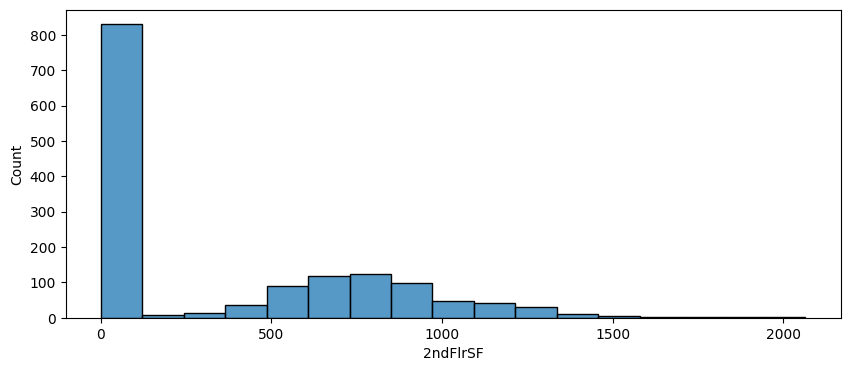

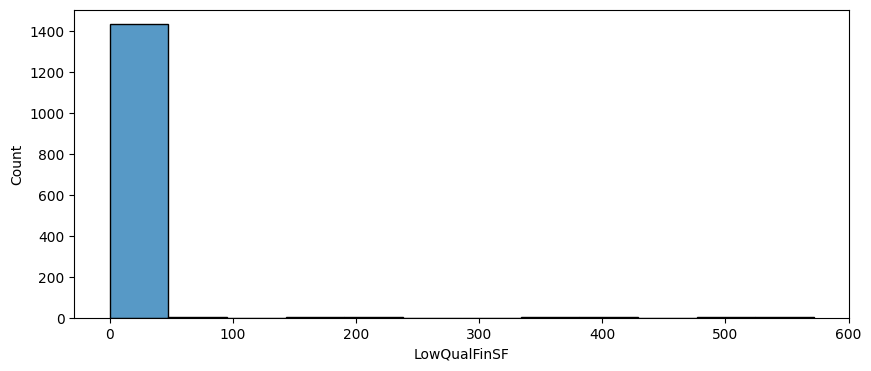

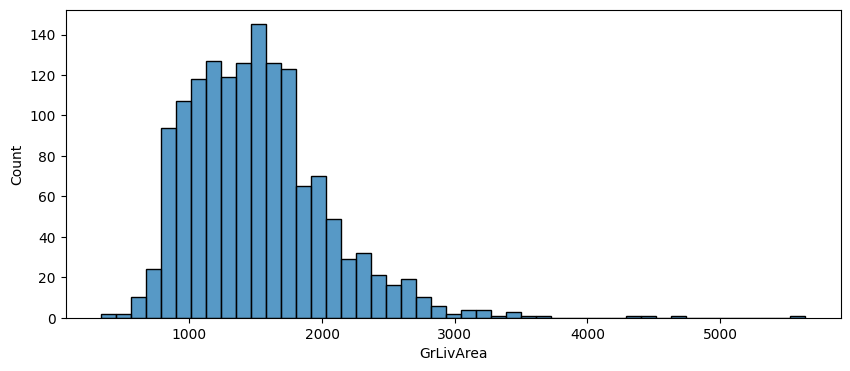

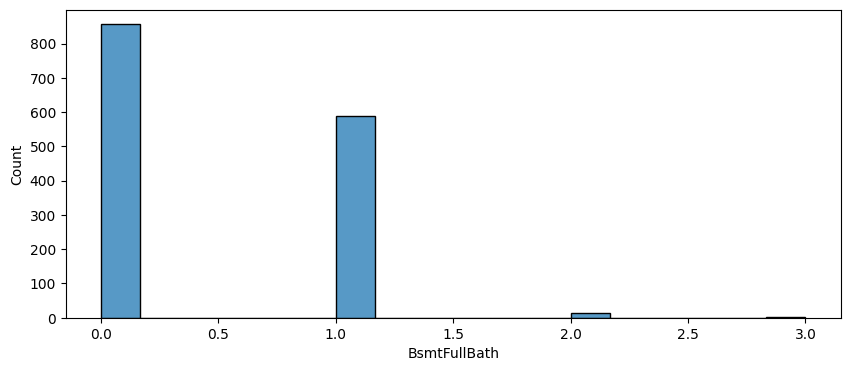

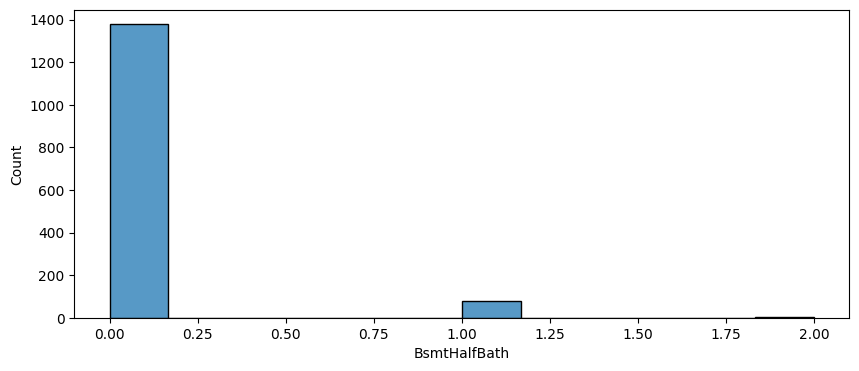

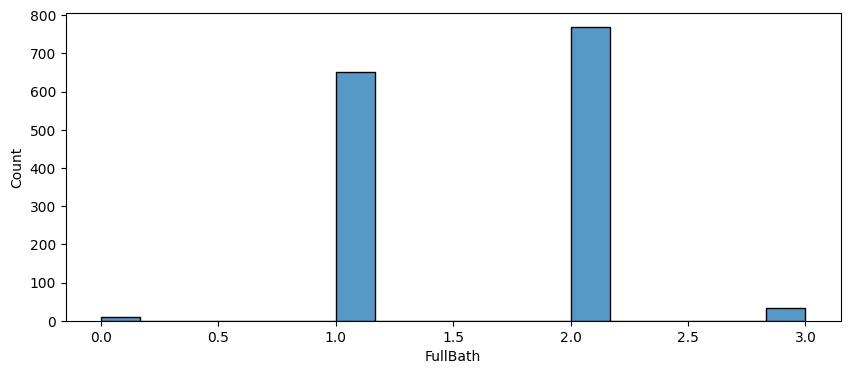

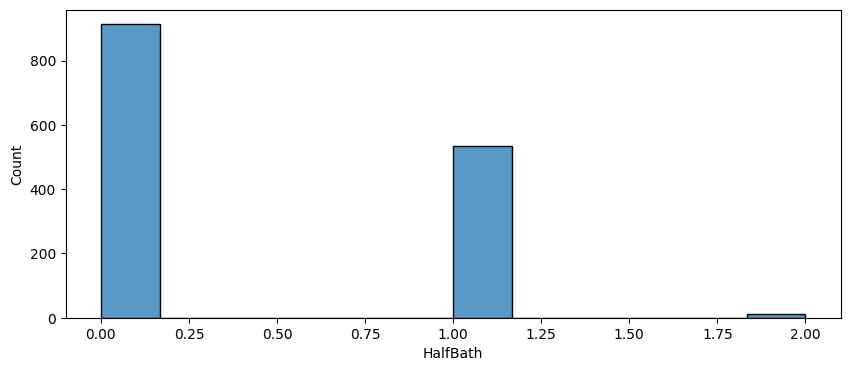

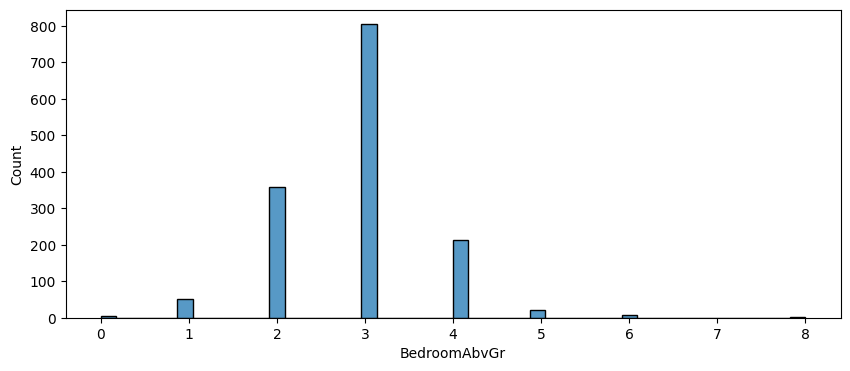

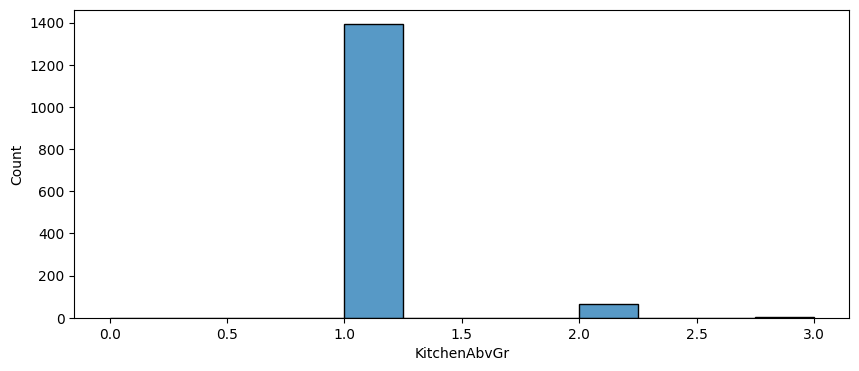

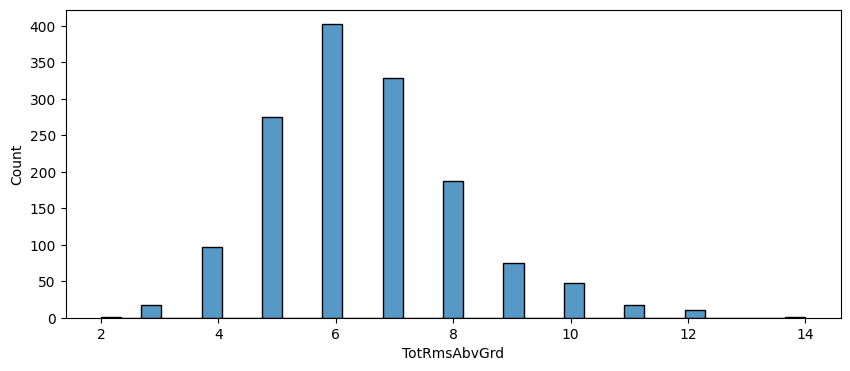

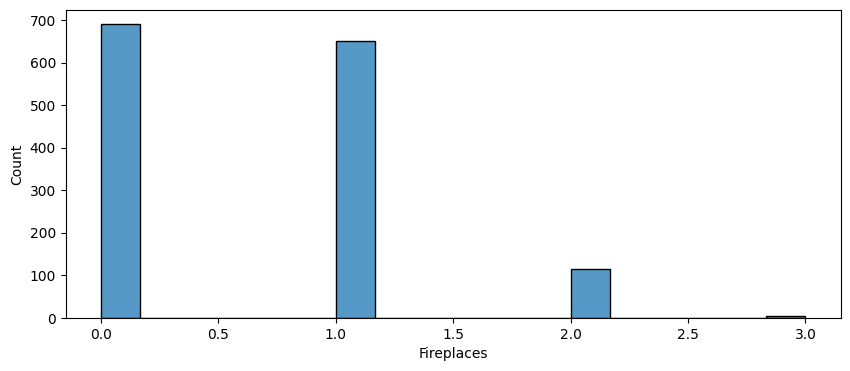

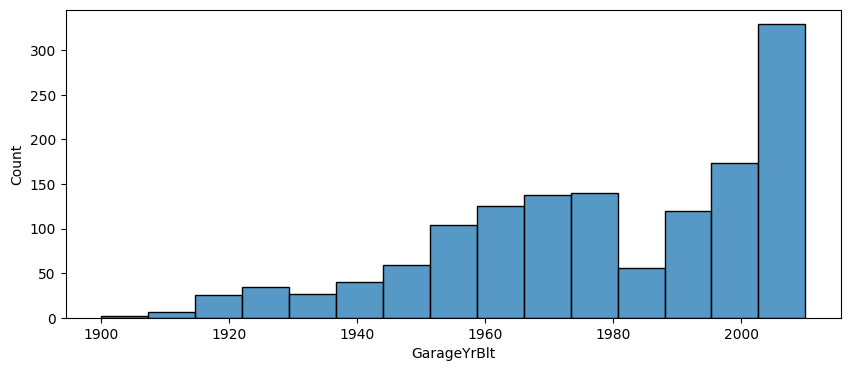

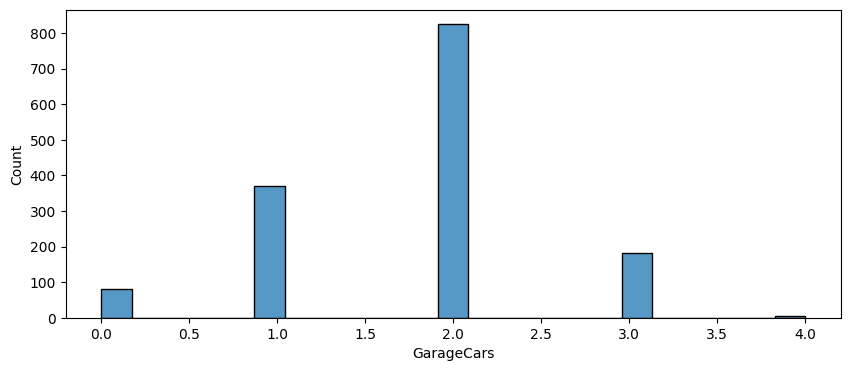

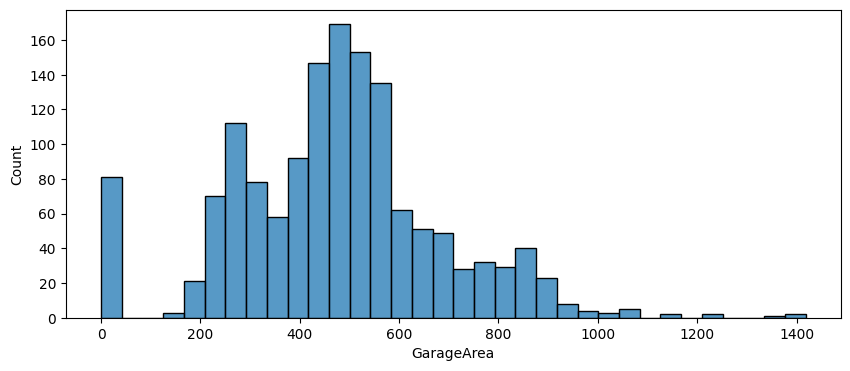

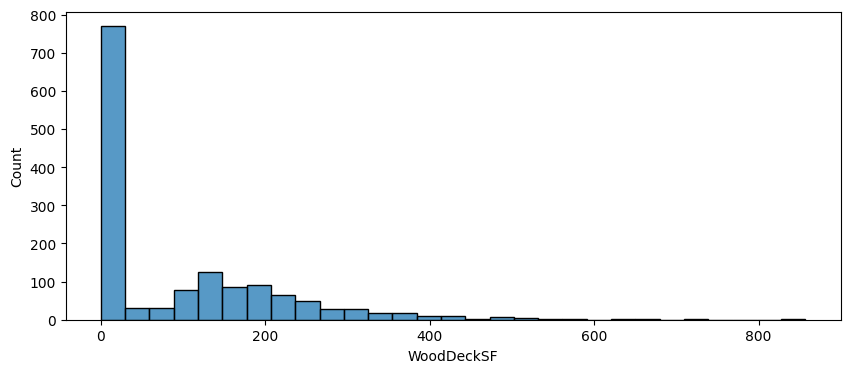

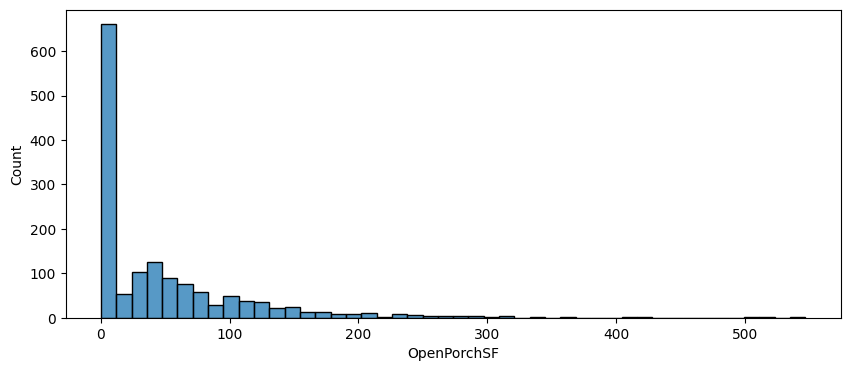

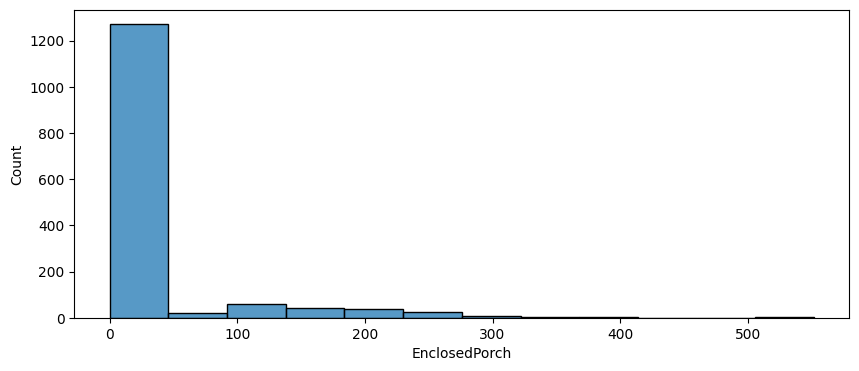

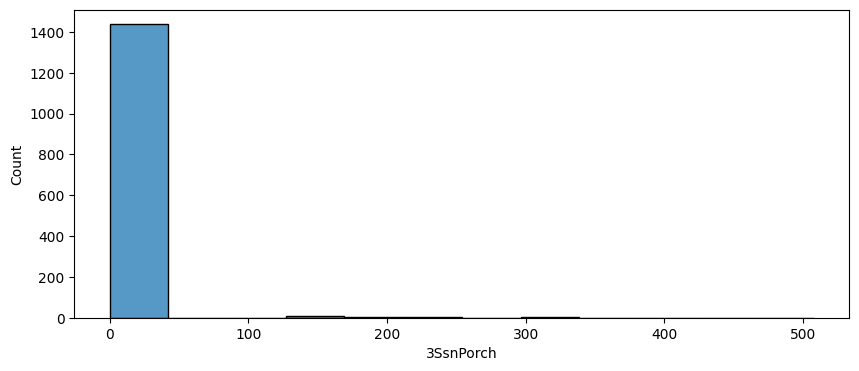

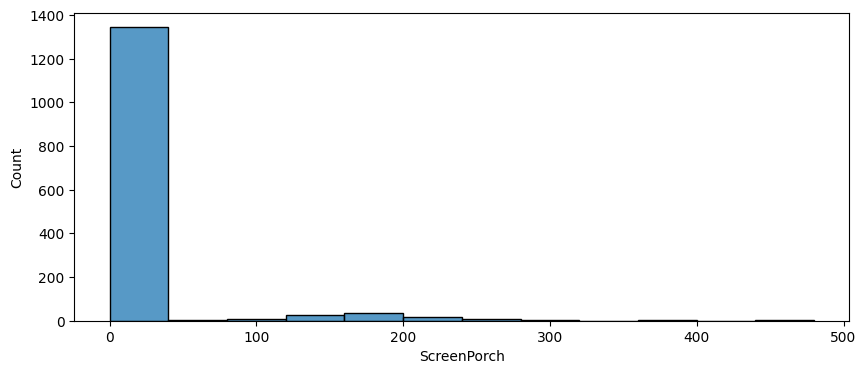

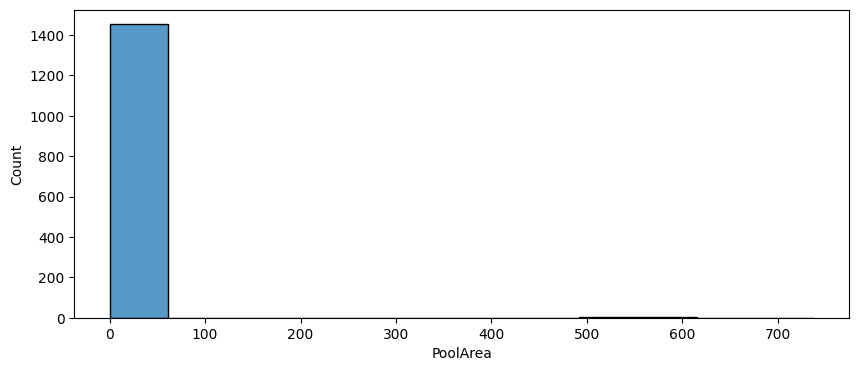

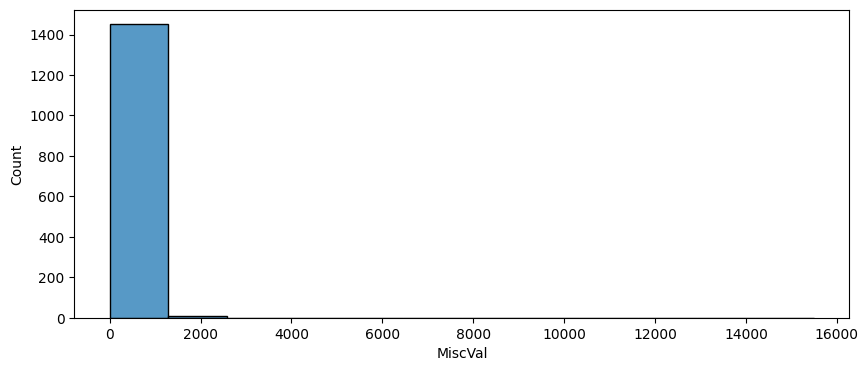

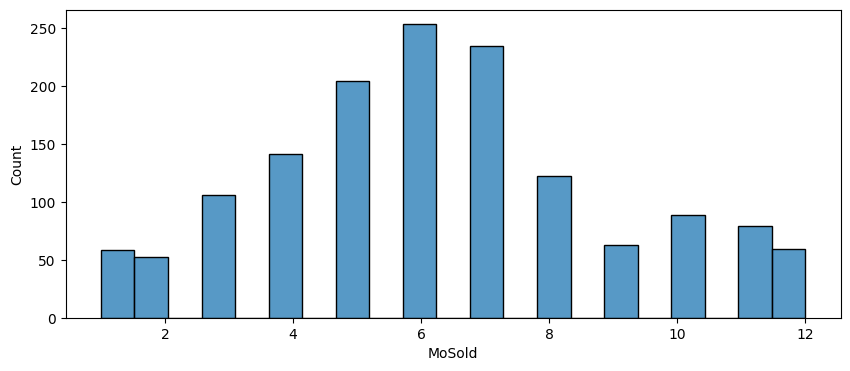

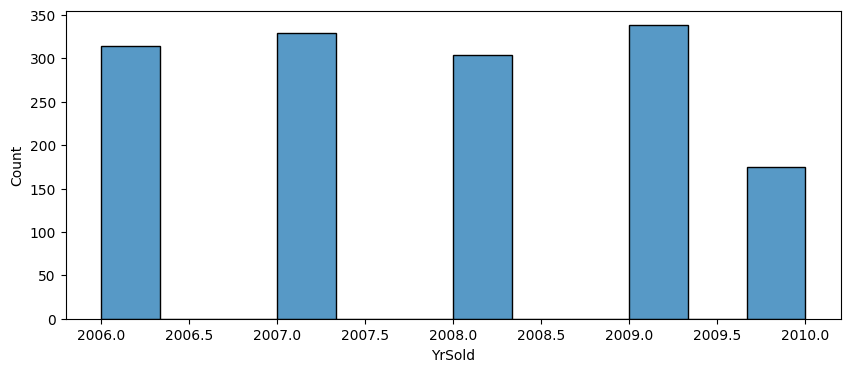

In [9]:
# 숫자형 변수 히스토그램 (36개 변수)
for col in numerics:
    plt.figure(figsize=(10, 4))
    sns.histplot(x=col, data=data)
    plt.show()

### 범주형 변수의 데이터 확인

In [10]:
for col in categoricals:
    print(data[col].value_counts(), '\n')

MSZoning
RL           1151
RM            218
FV             65
RH             16
'C (all)'      10
Name: count, dtype: int64 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17

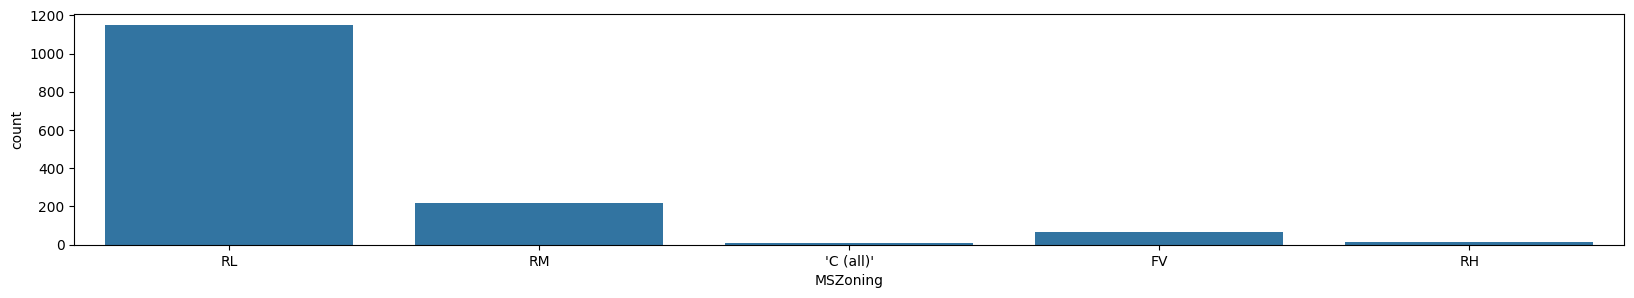

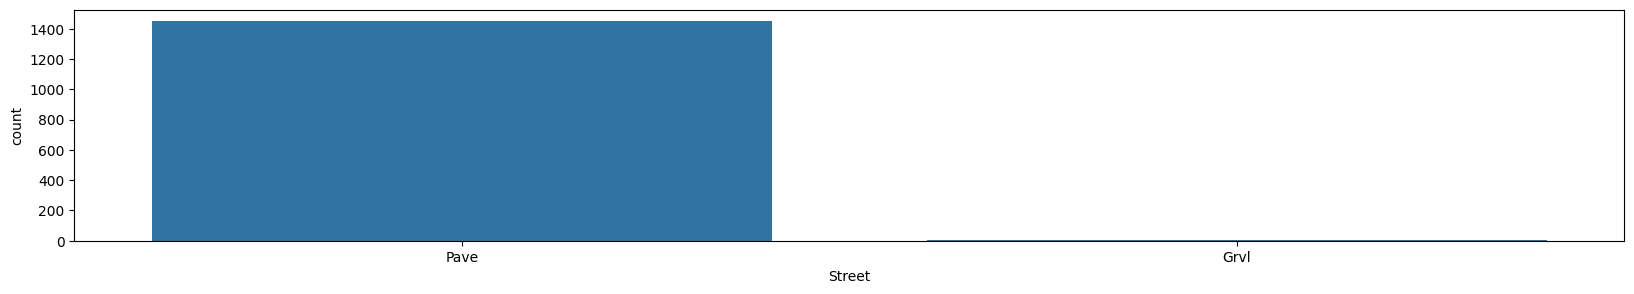

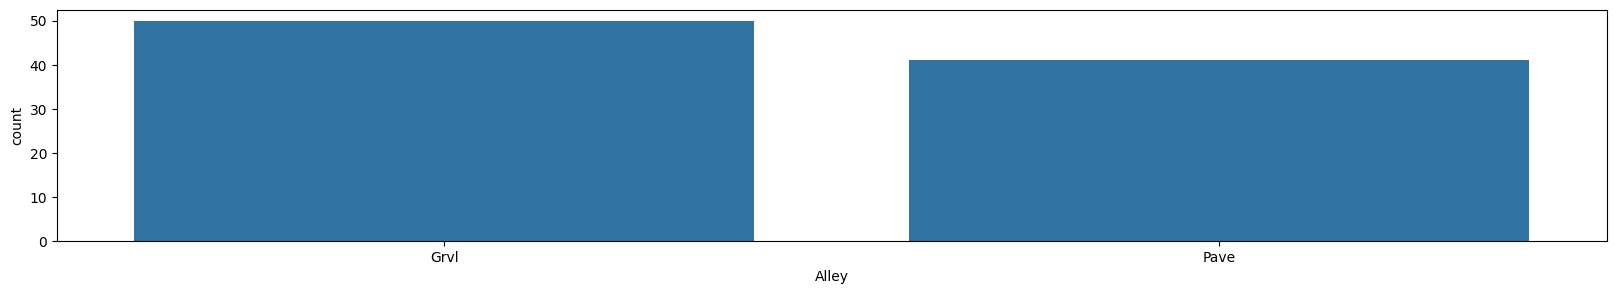

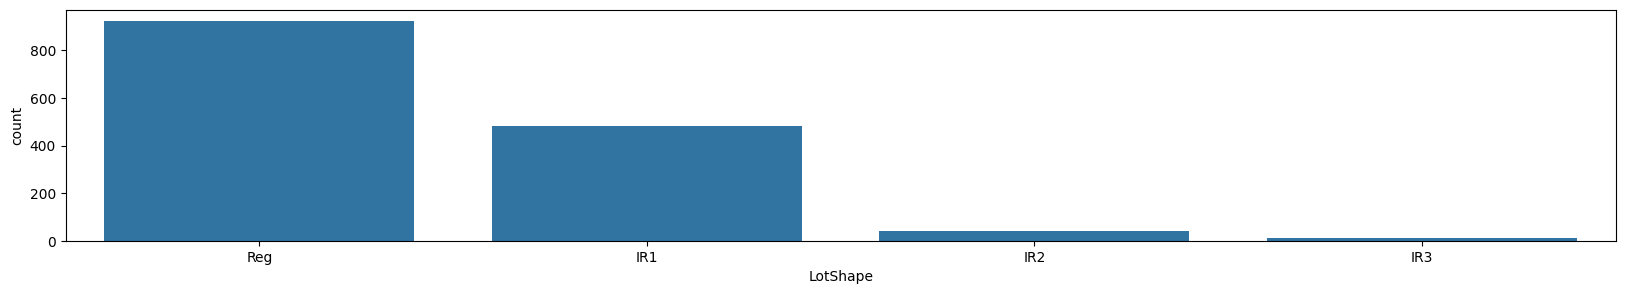

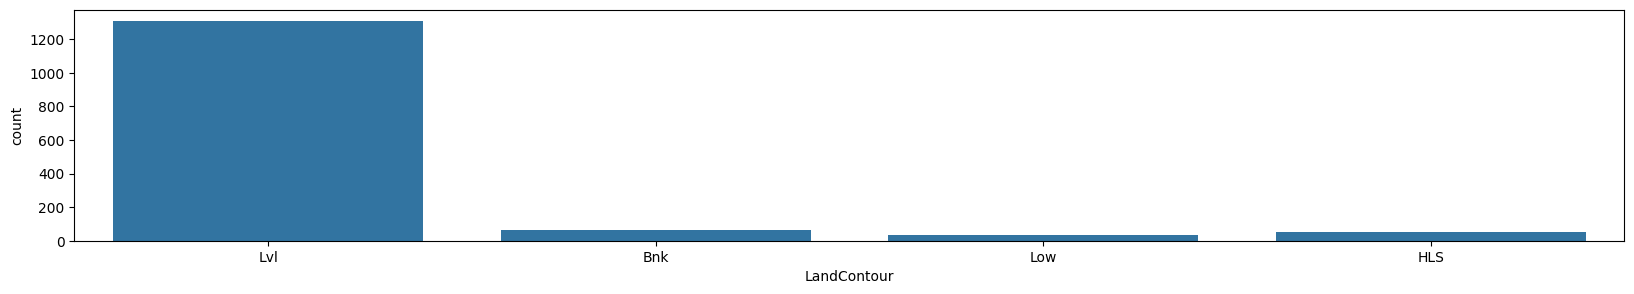

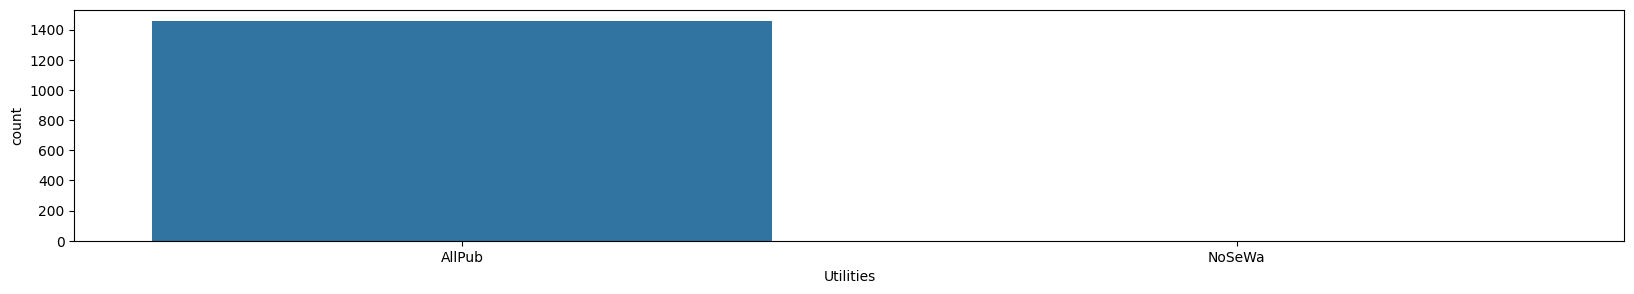

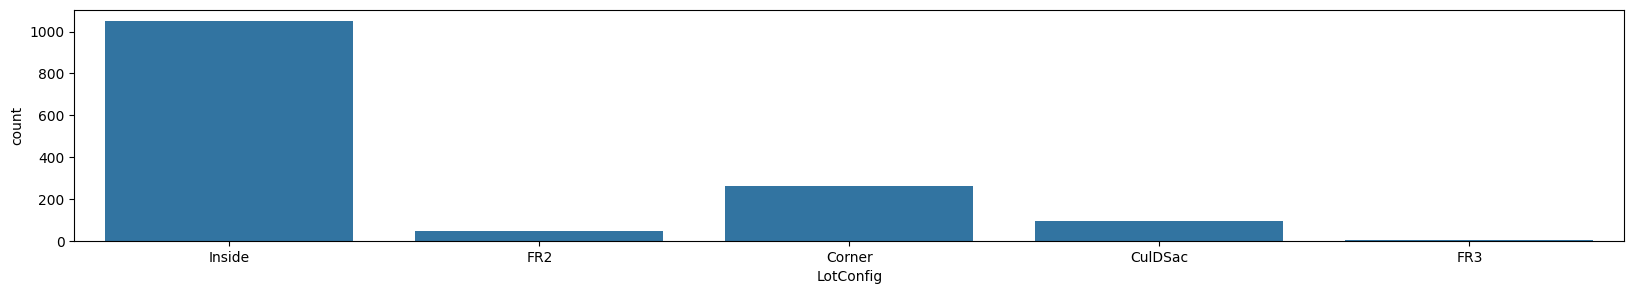

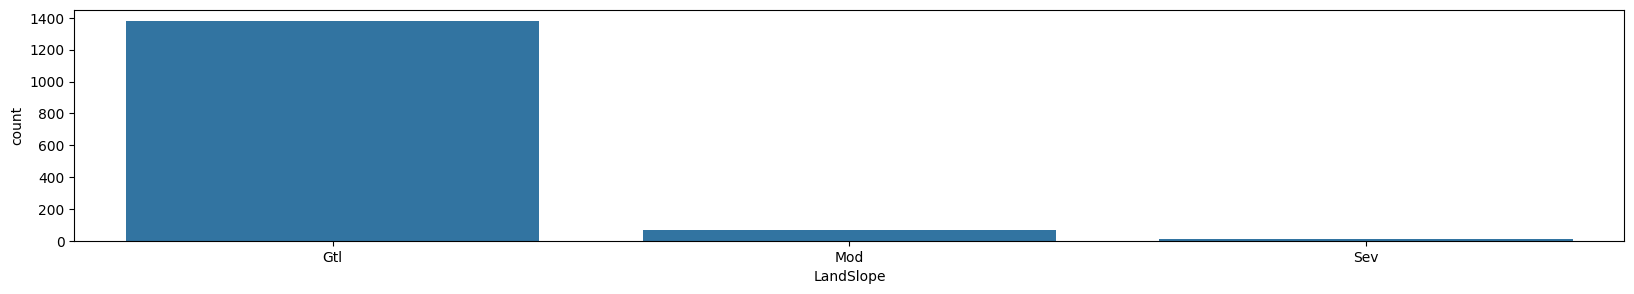

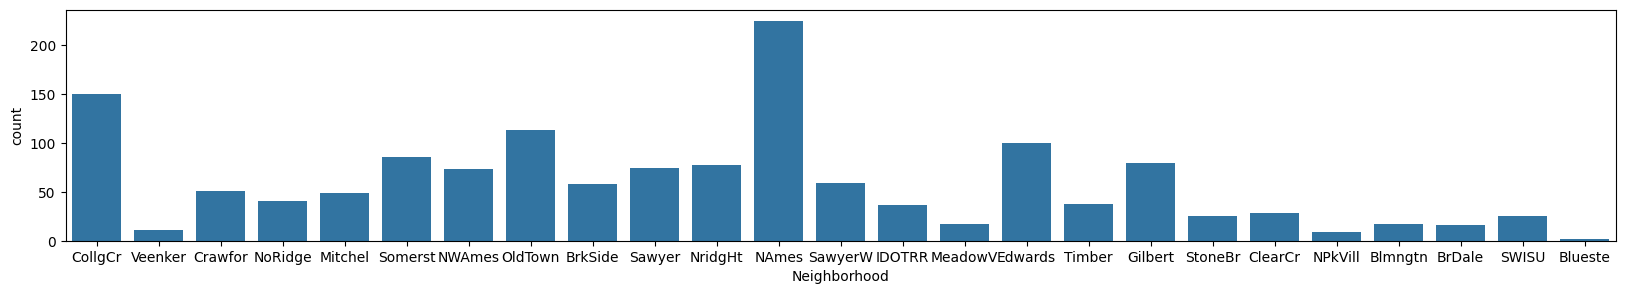

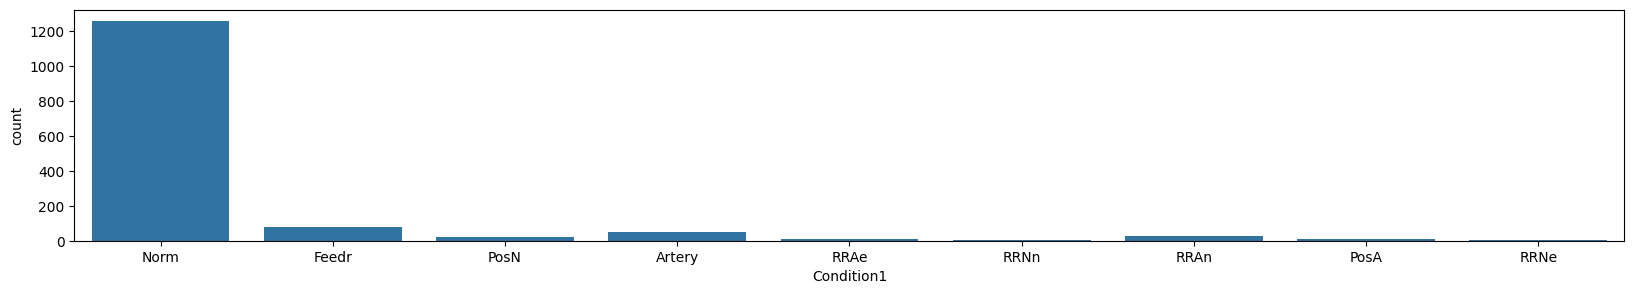

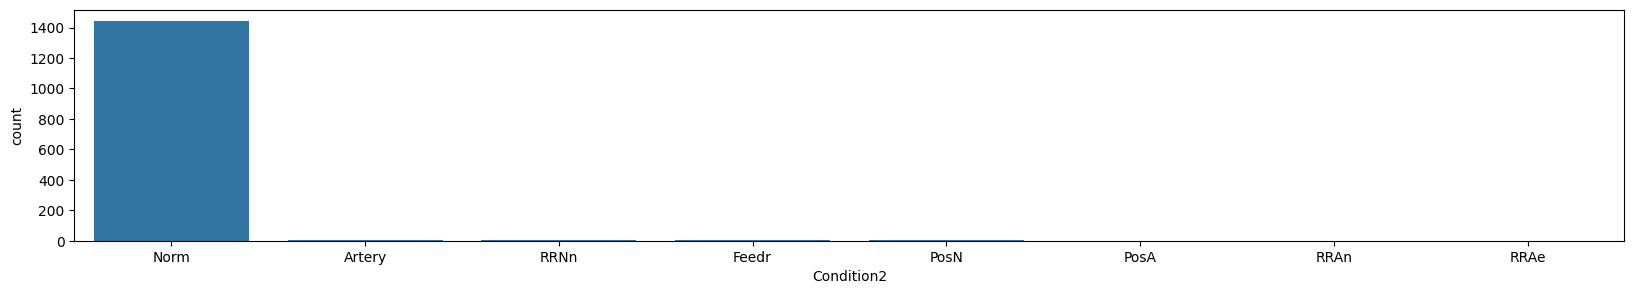

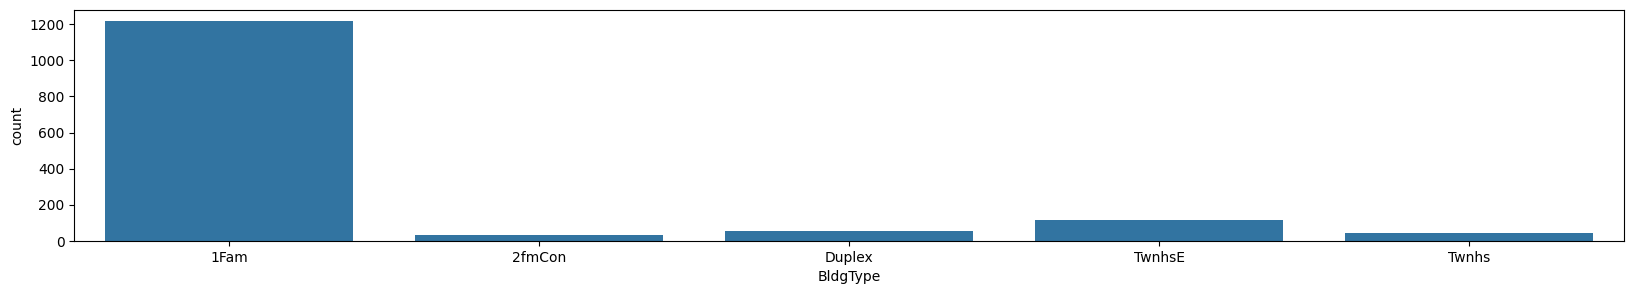

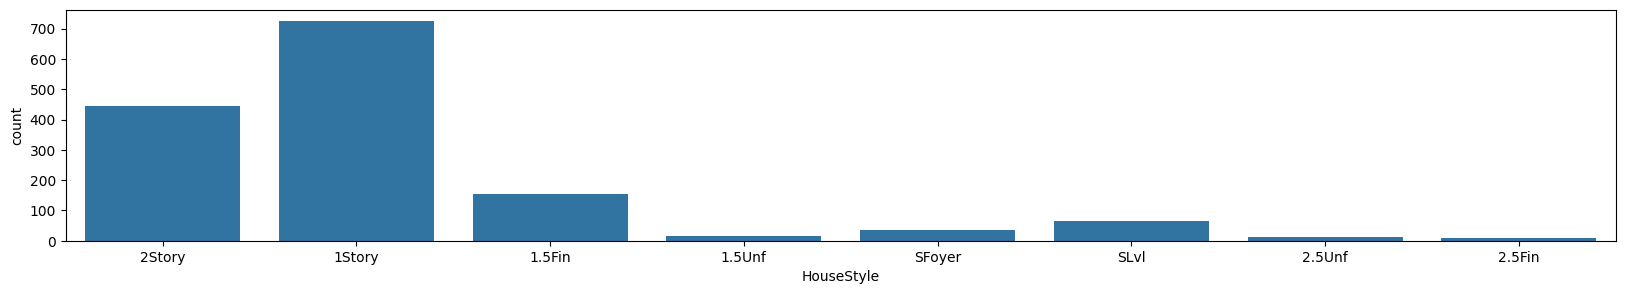

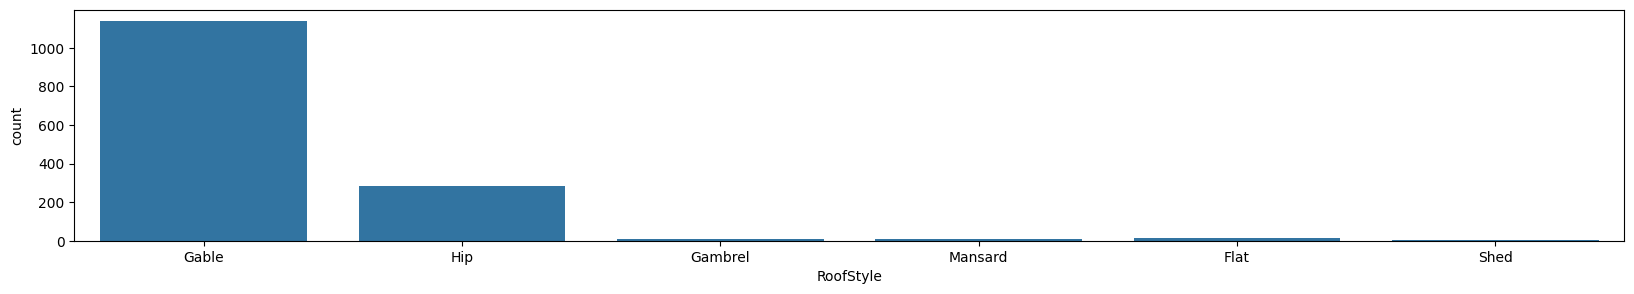

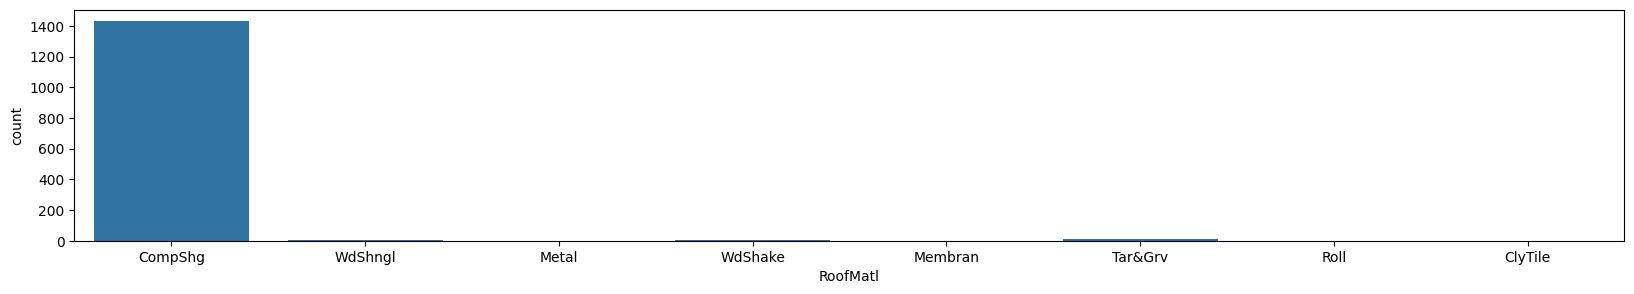

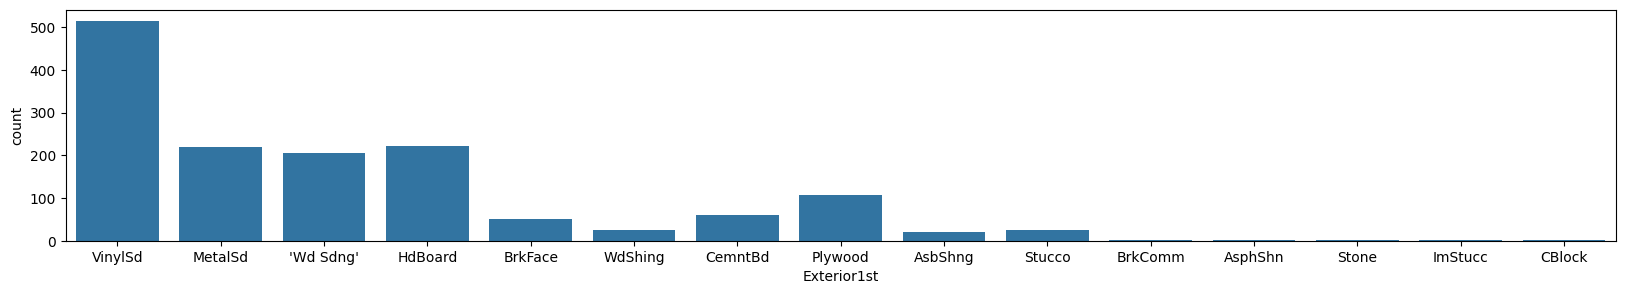

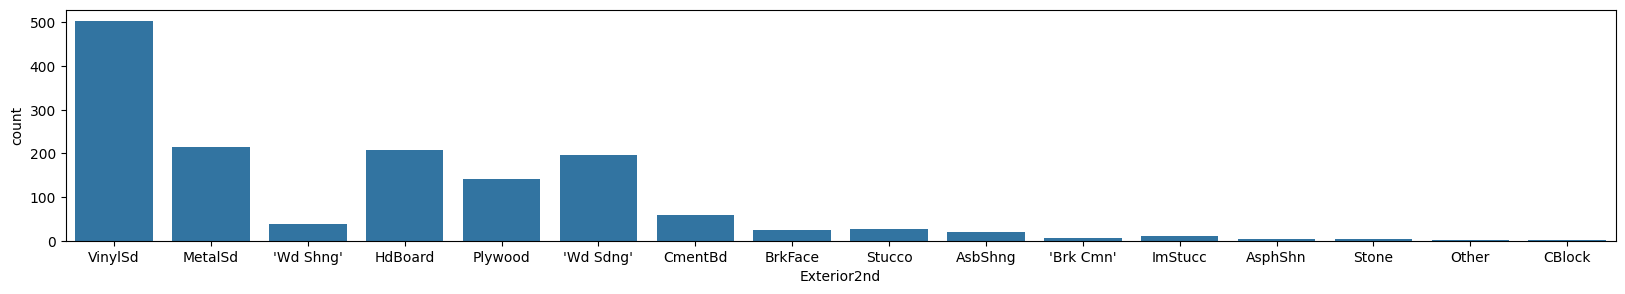

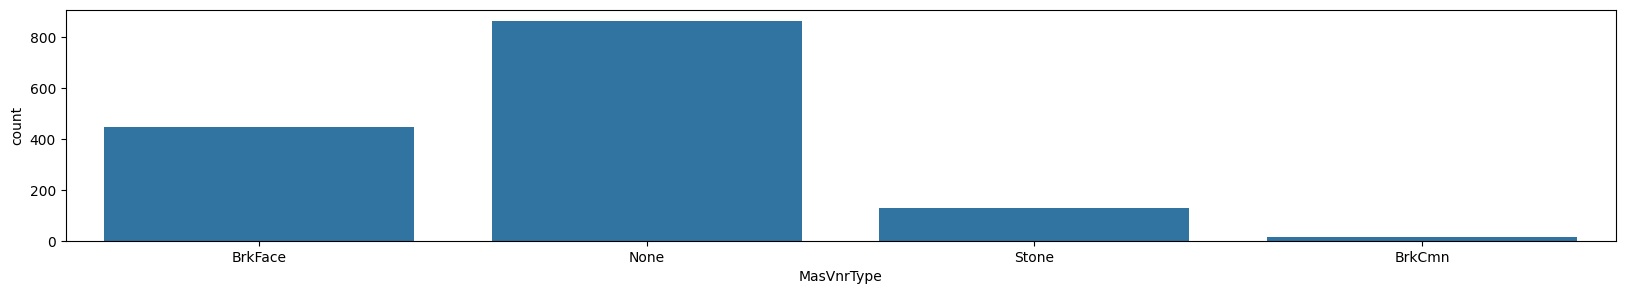

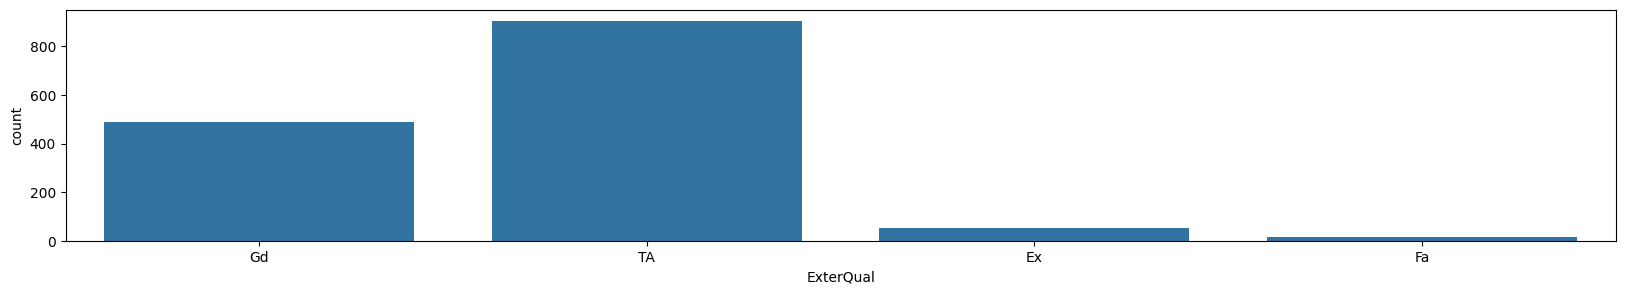

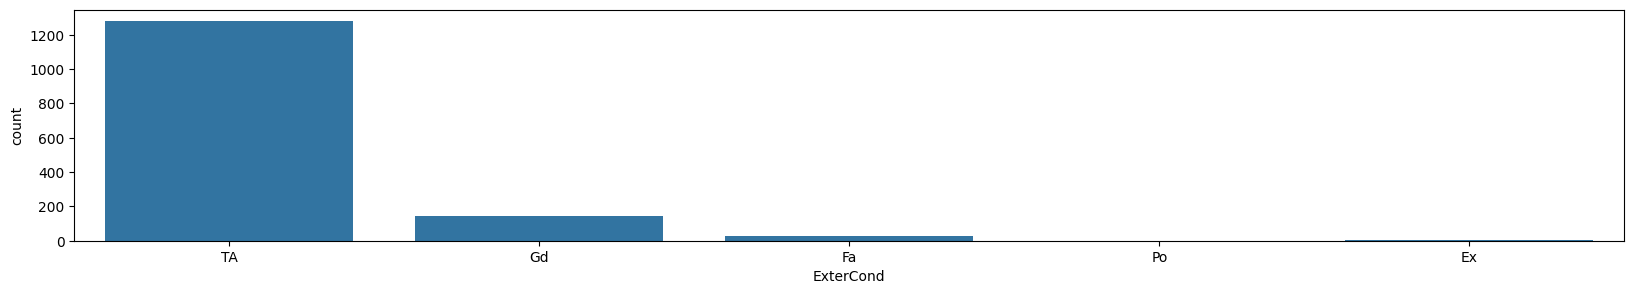

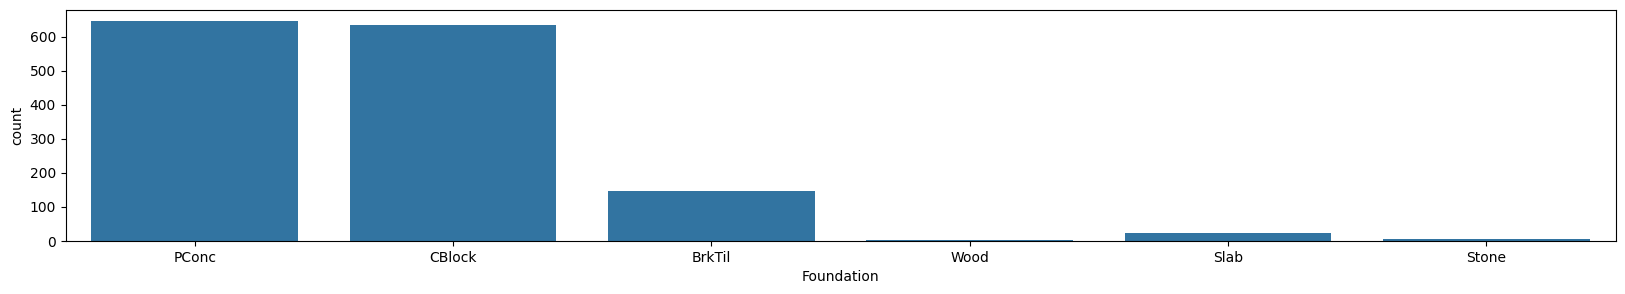

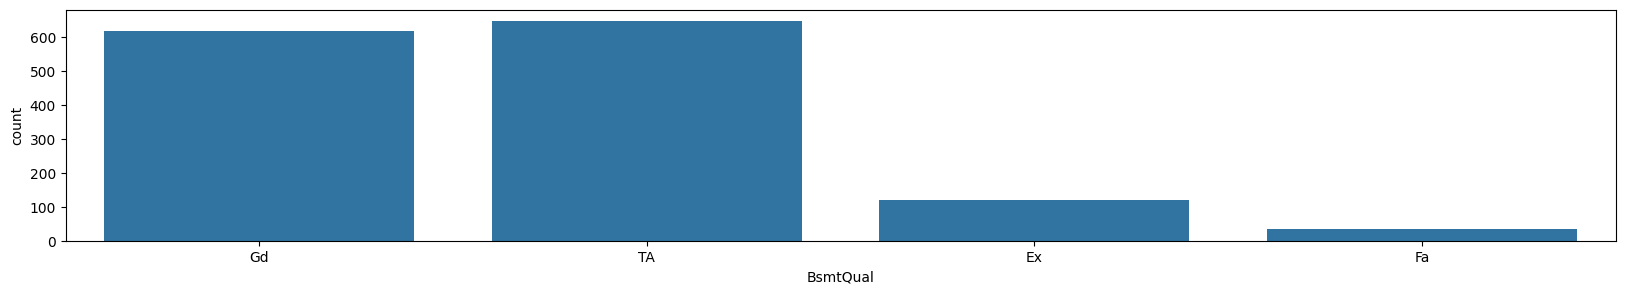

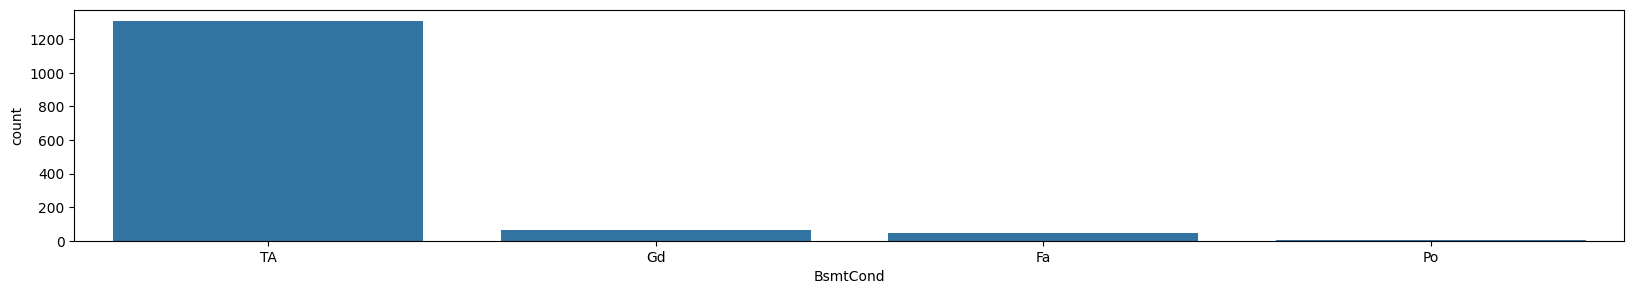

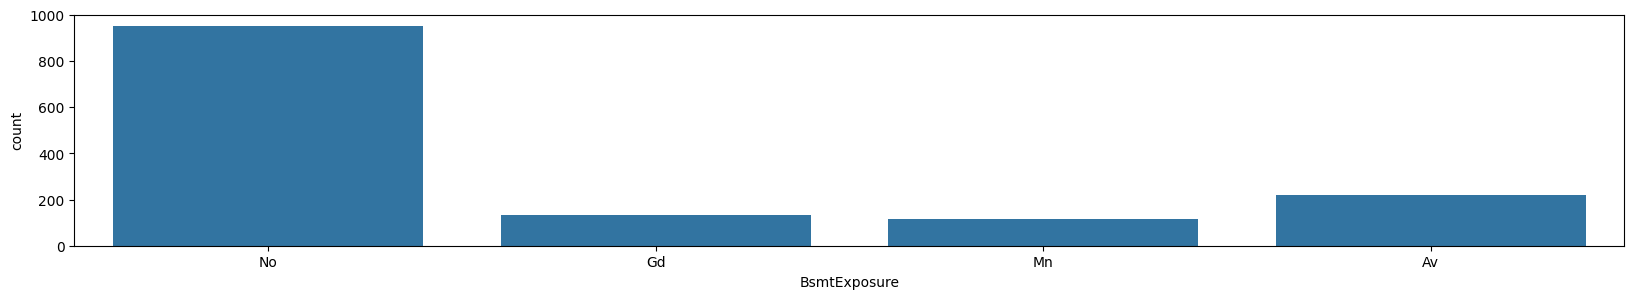

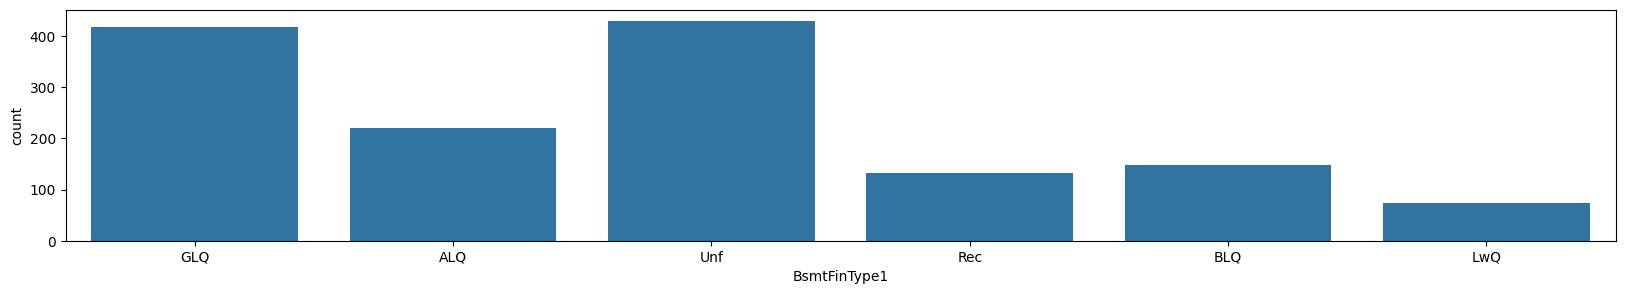

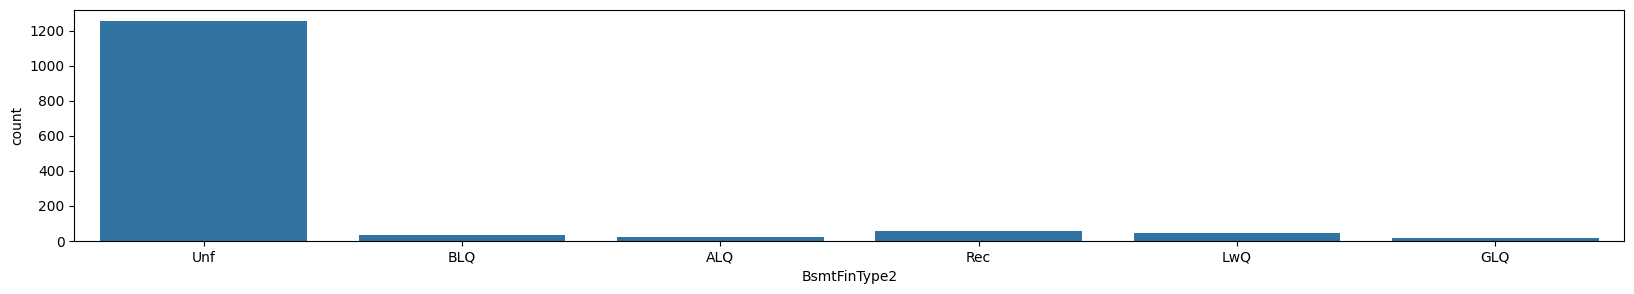

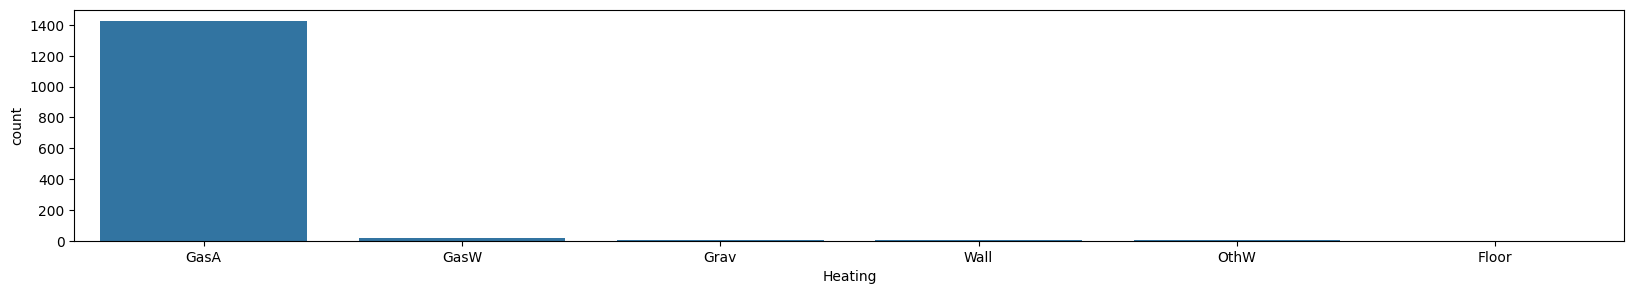

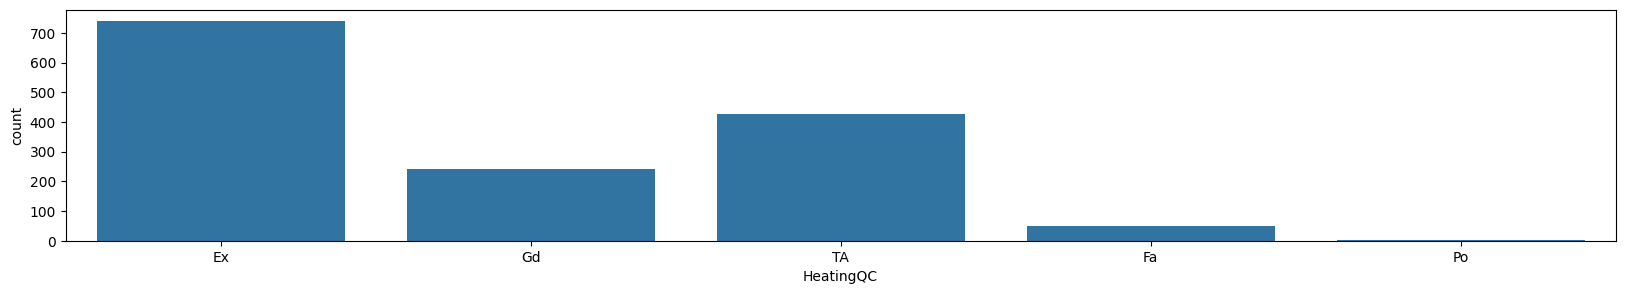

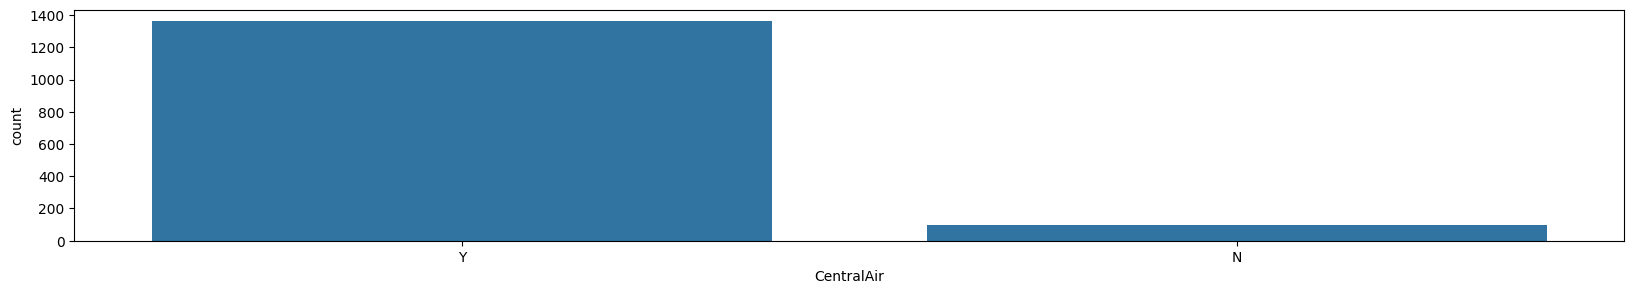

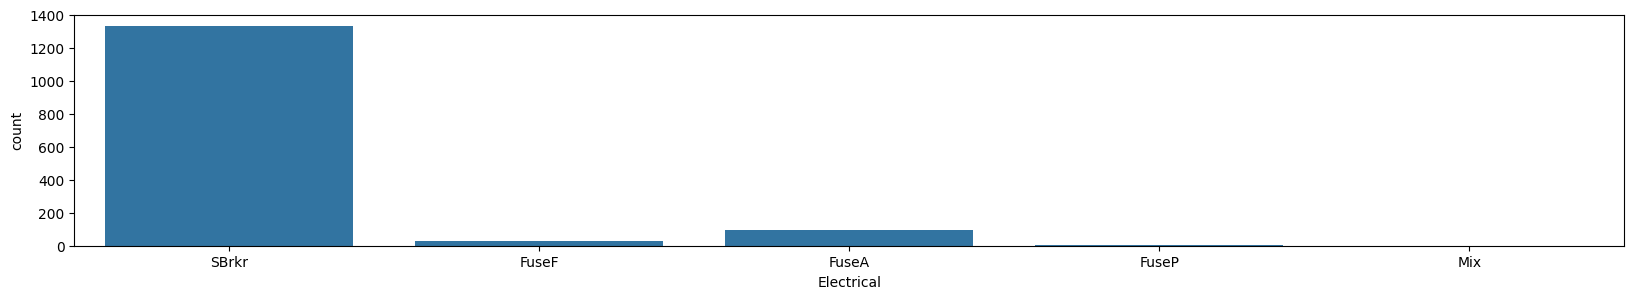

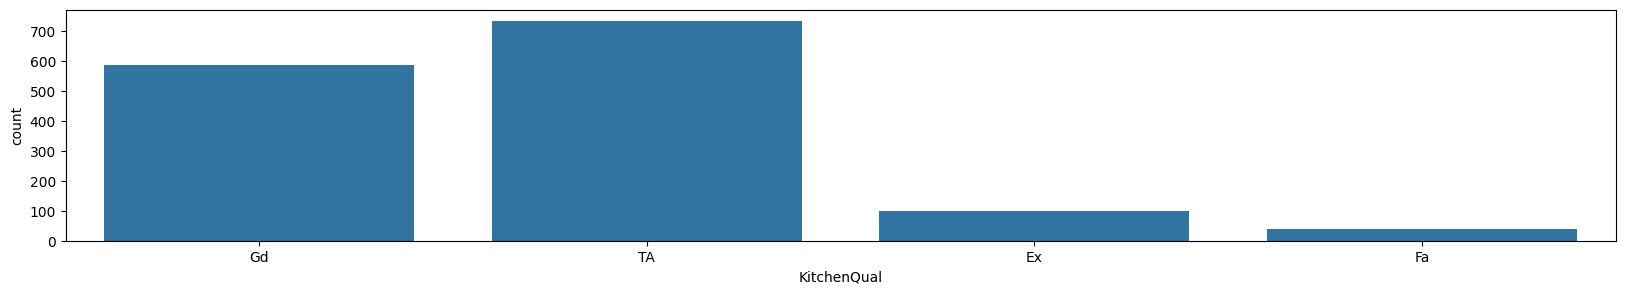

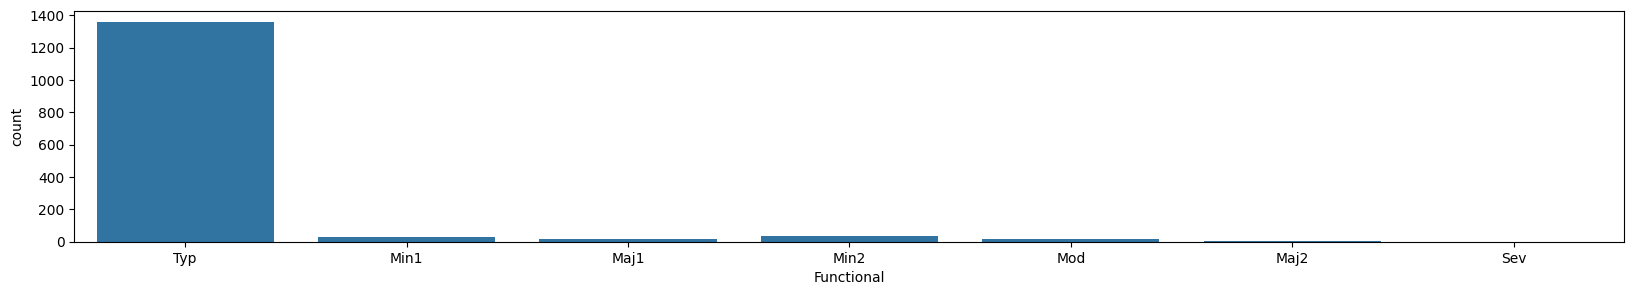

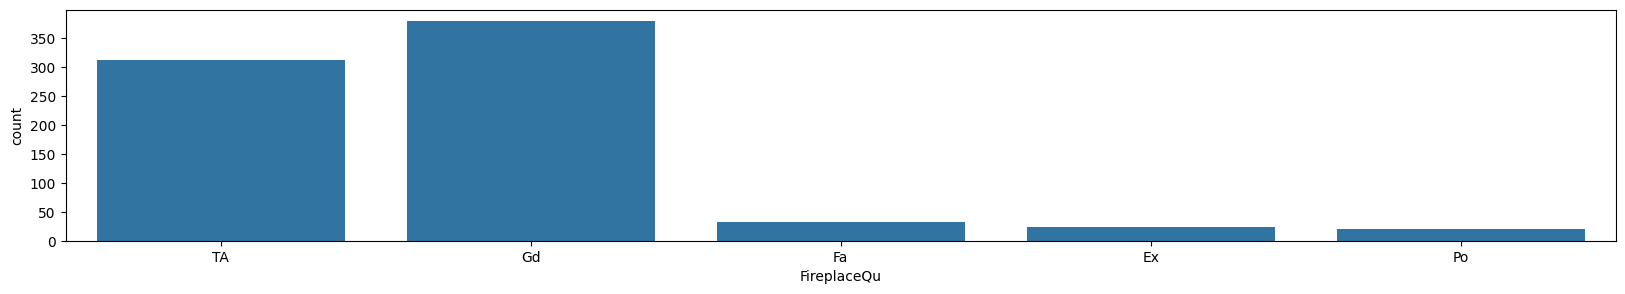

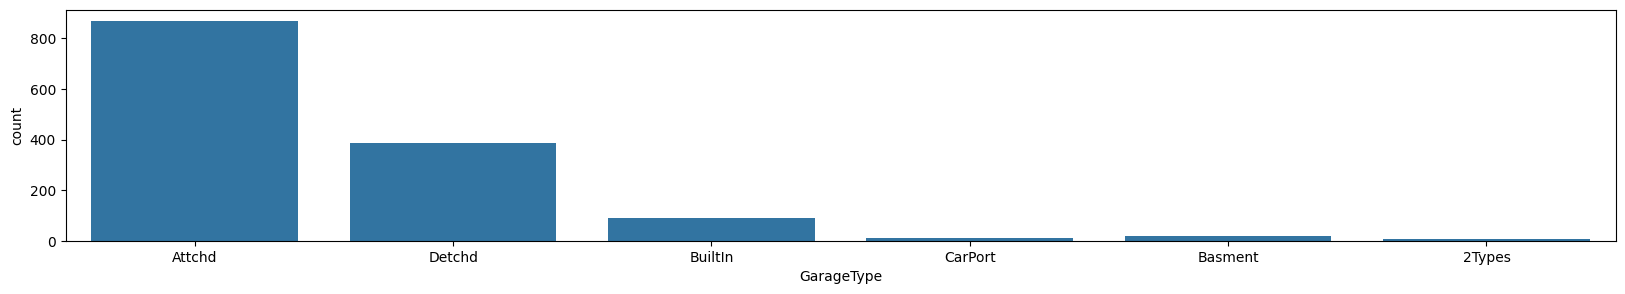

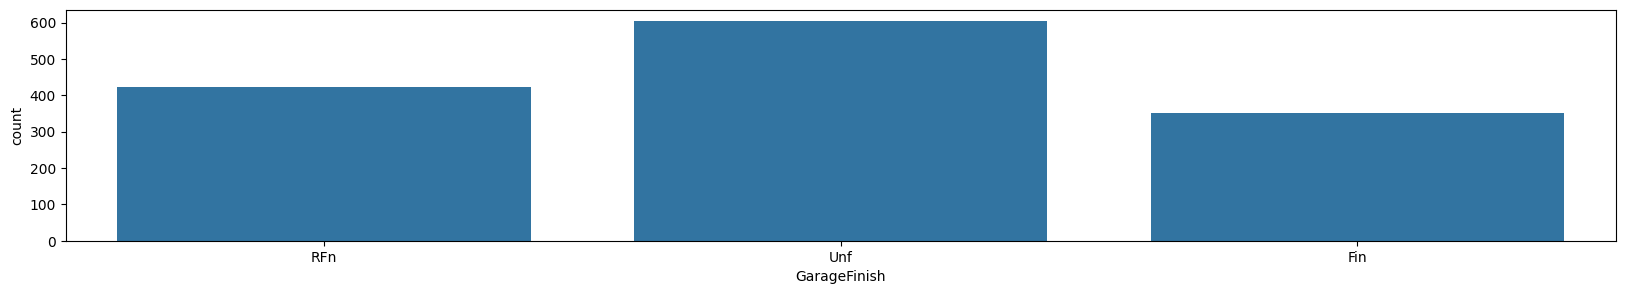

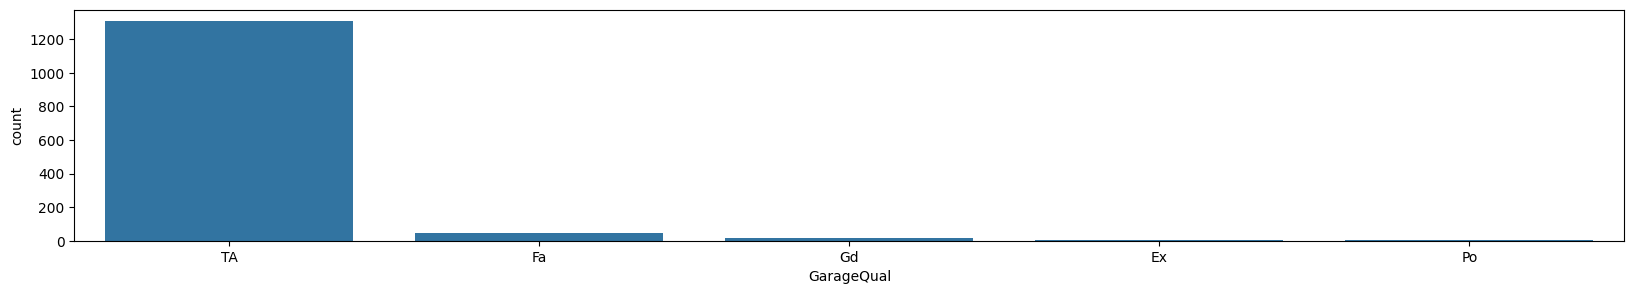

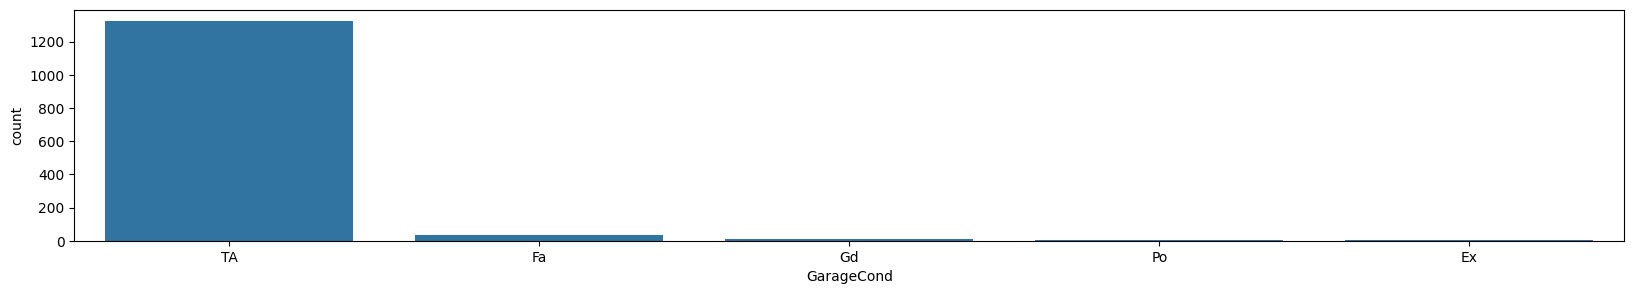

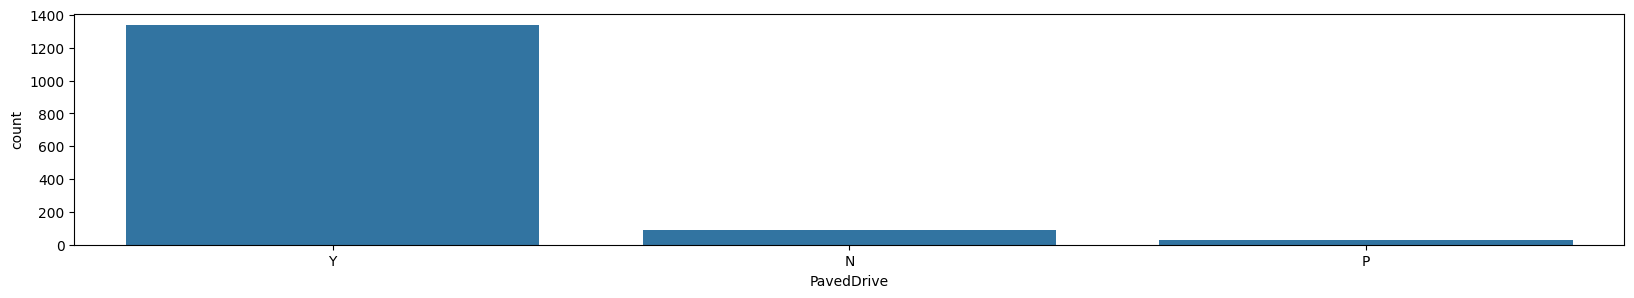

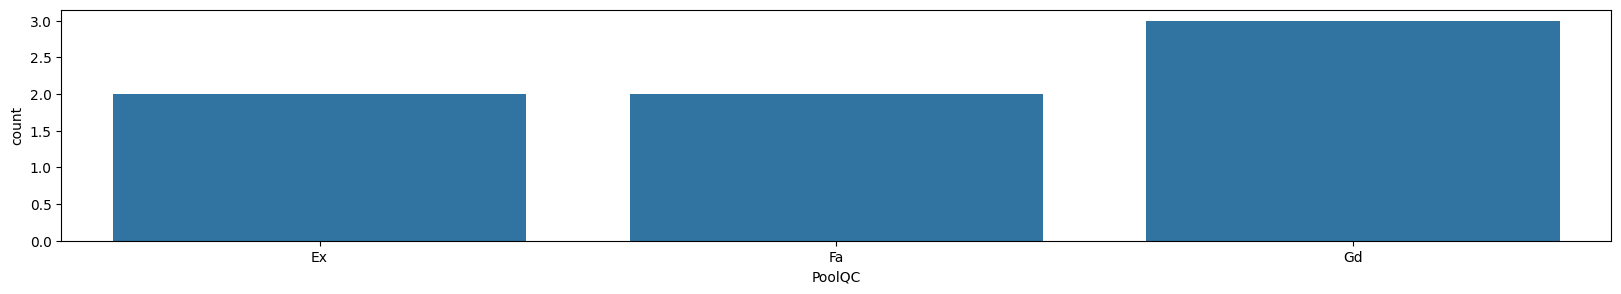

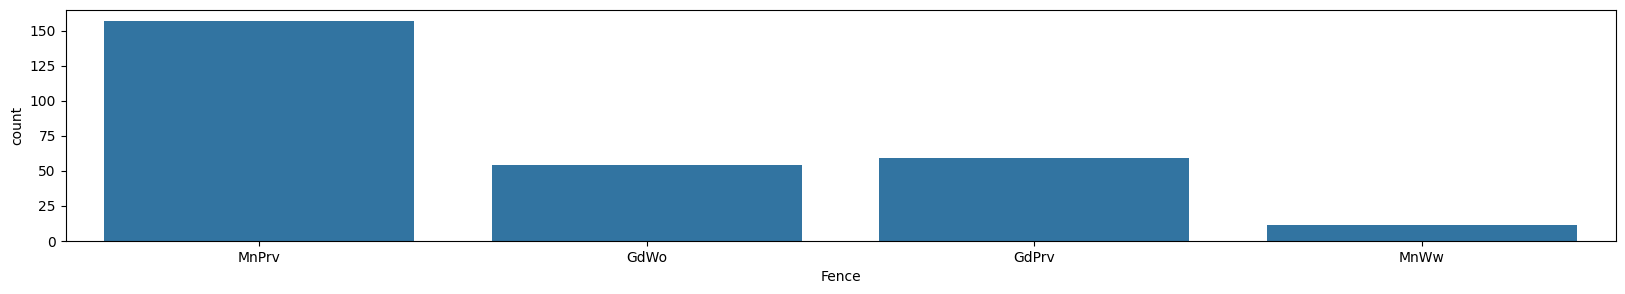

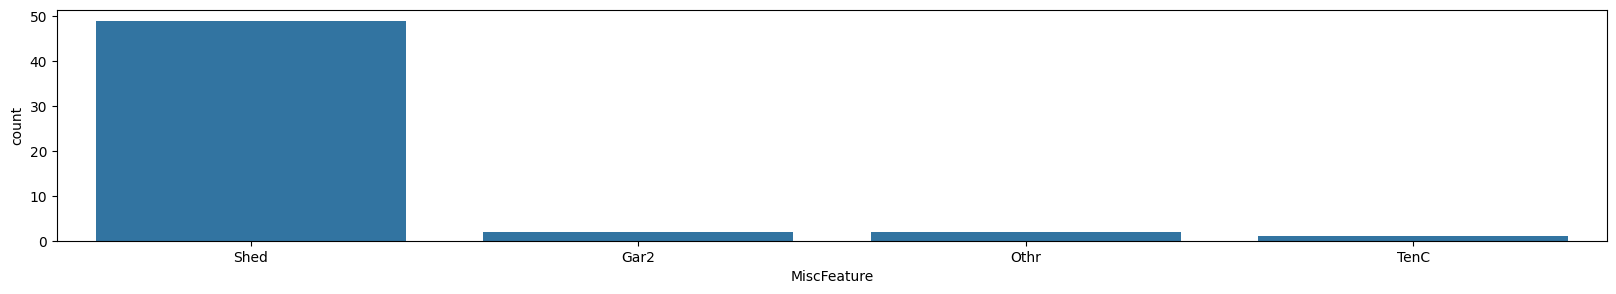

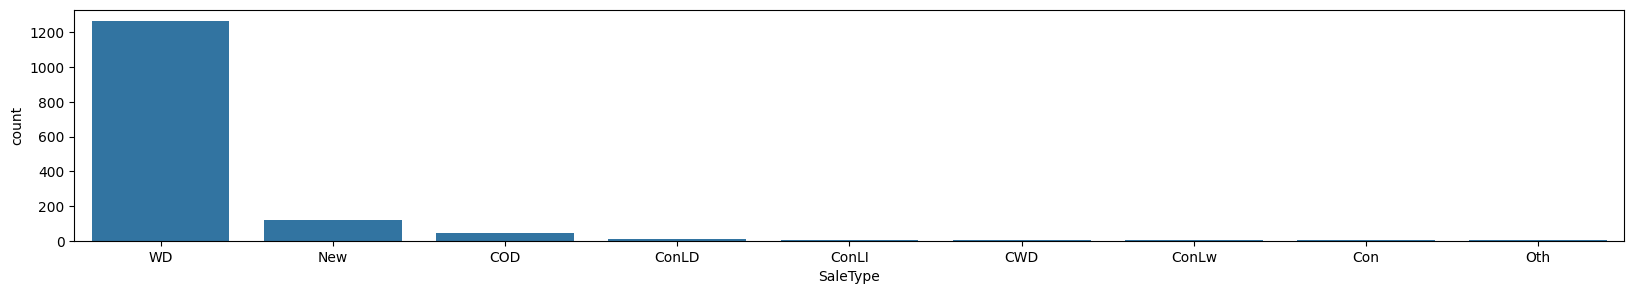

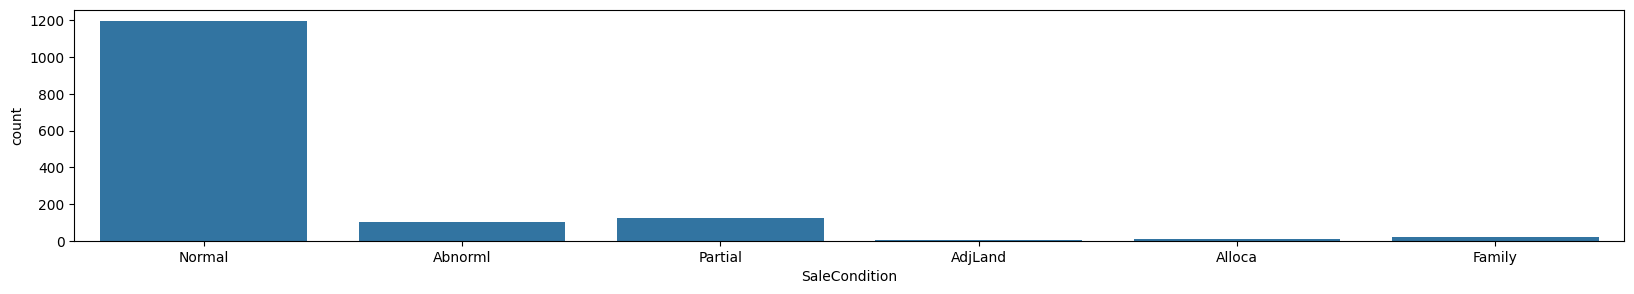

In [11]:
# 범주형 변수 시각화화
for col in categoricals:
    plt.figure(figsize=(20, 3))
    sns.countplot(x=col, data=data)
    plt.show()

### 결측값 (missing value)

In [12]:
missing = data.isnull().sum()
missing

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

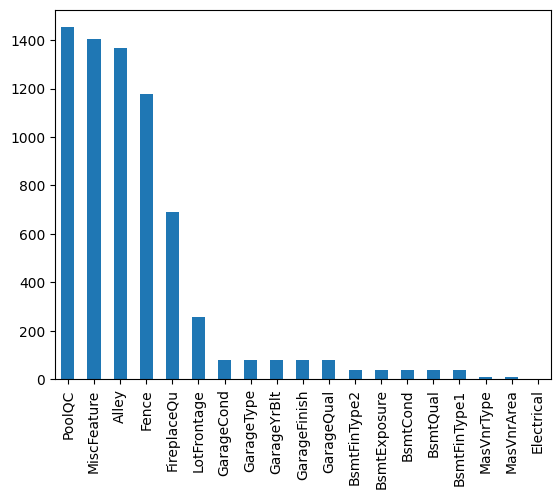

In [13]:
# 결측치가 존재하는 값만 시각화
missing[missing > 0].sort_values(ascending=False).plot(kind='bar')

In [14]:
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing
# 결측치가 많다고 하더라도 변수 표현을 변경해서 설명력을 높일 수 있다.
# 예를 들어, PoolQC : 수영장이 있다 없다 로 표현
# 또는 중복되는 의미의 변수는 줄여보기

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

<Axes: >

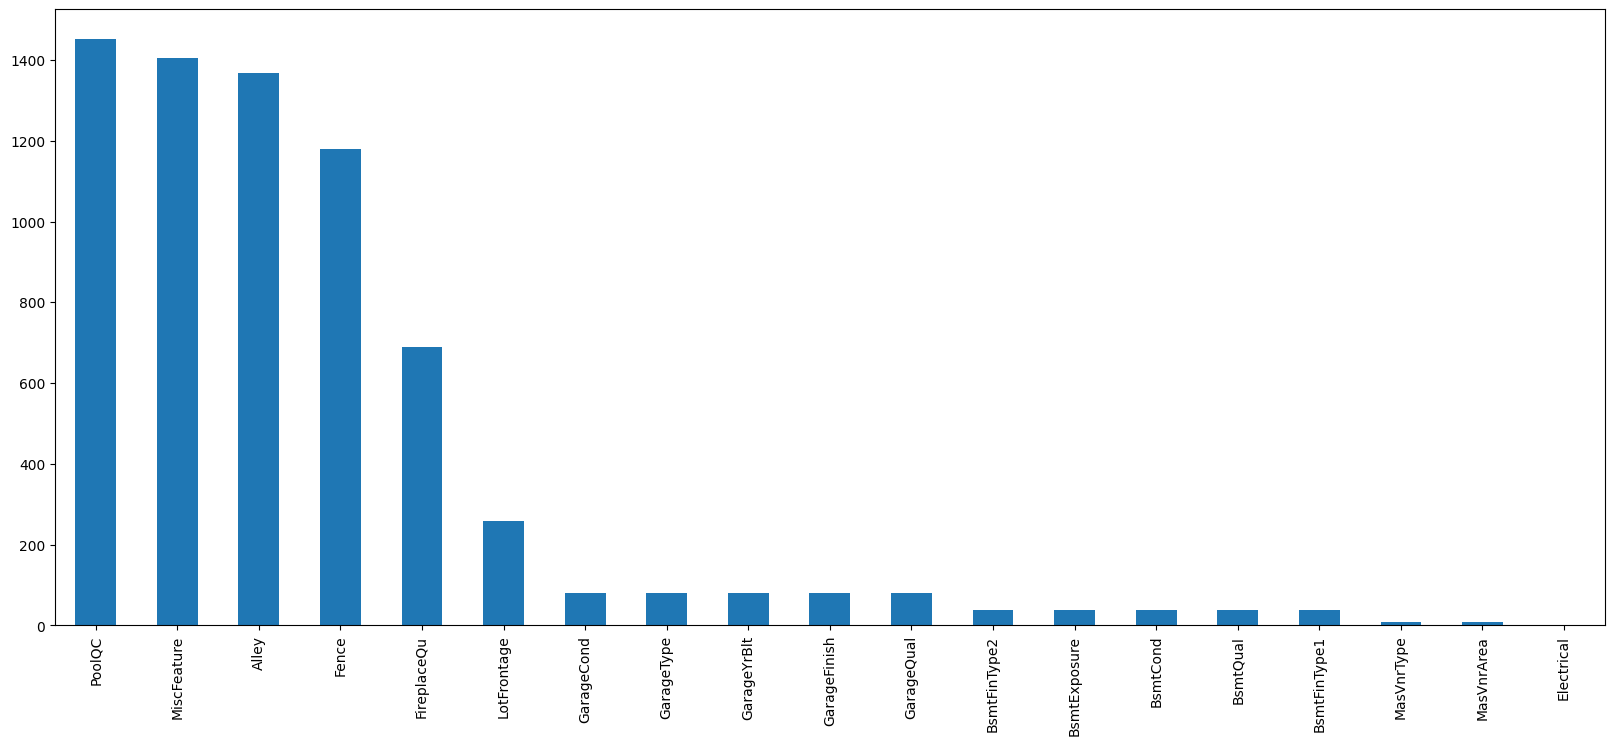

In [15]:
plt.figure(figsize=(20, 8))
missing.plot(kind='bar')

<Axes: >

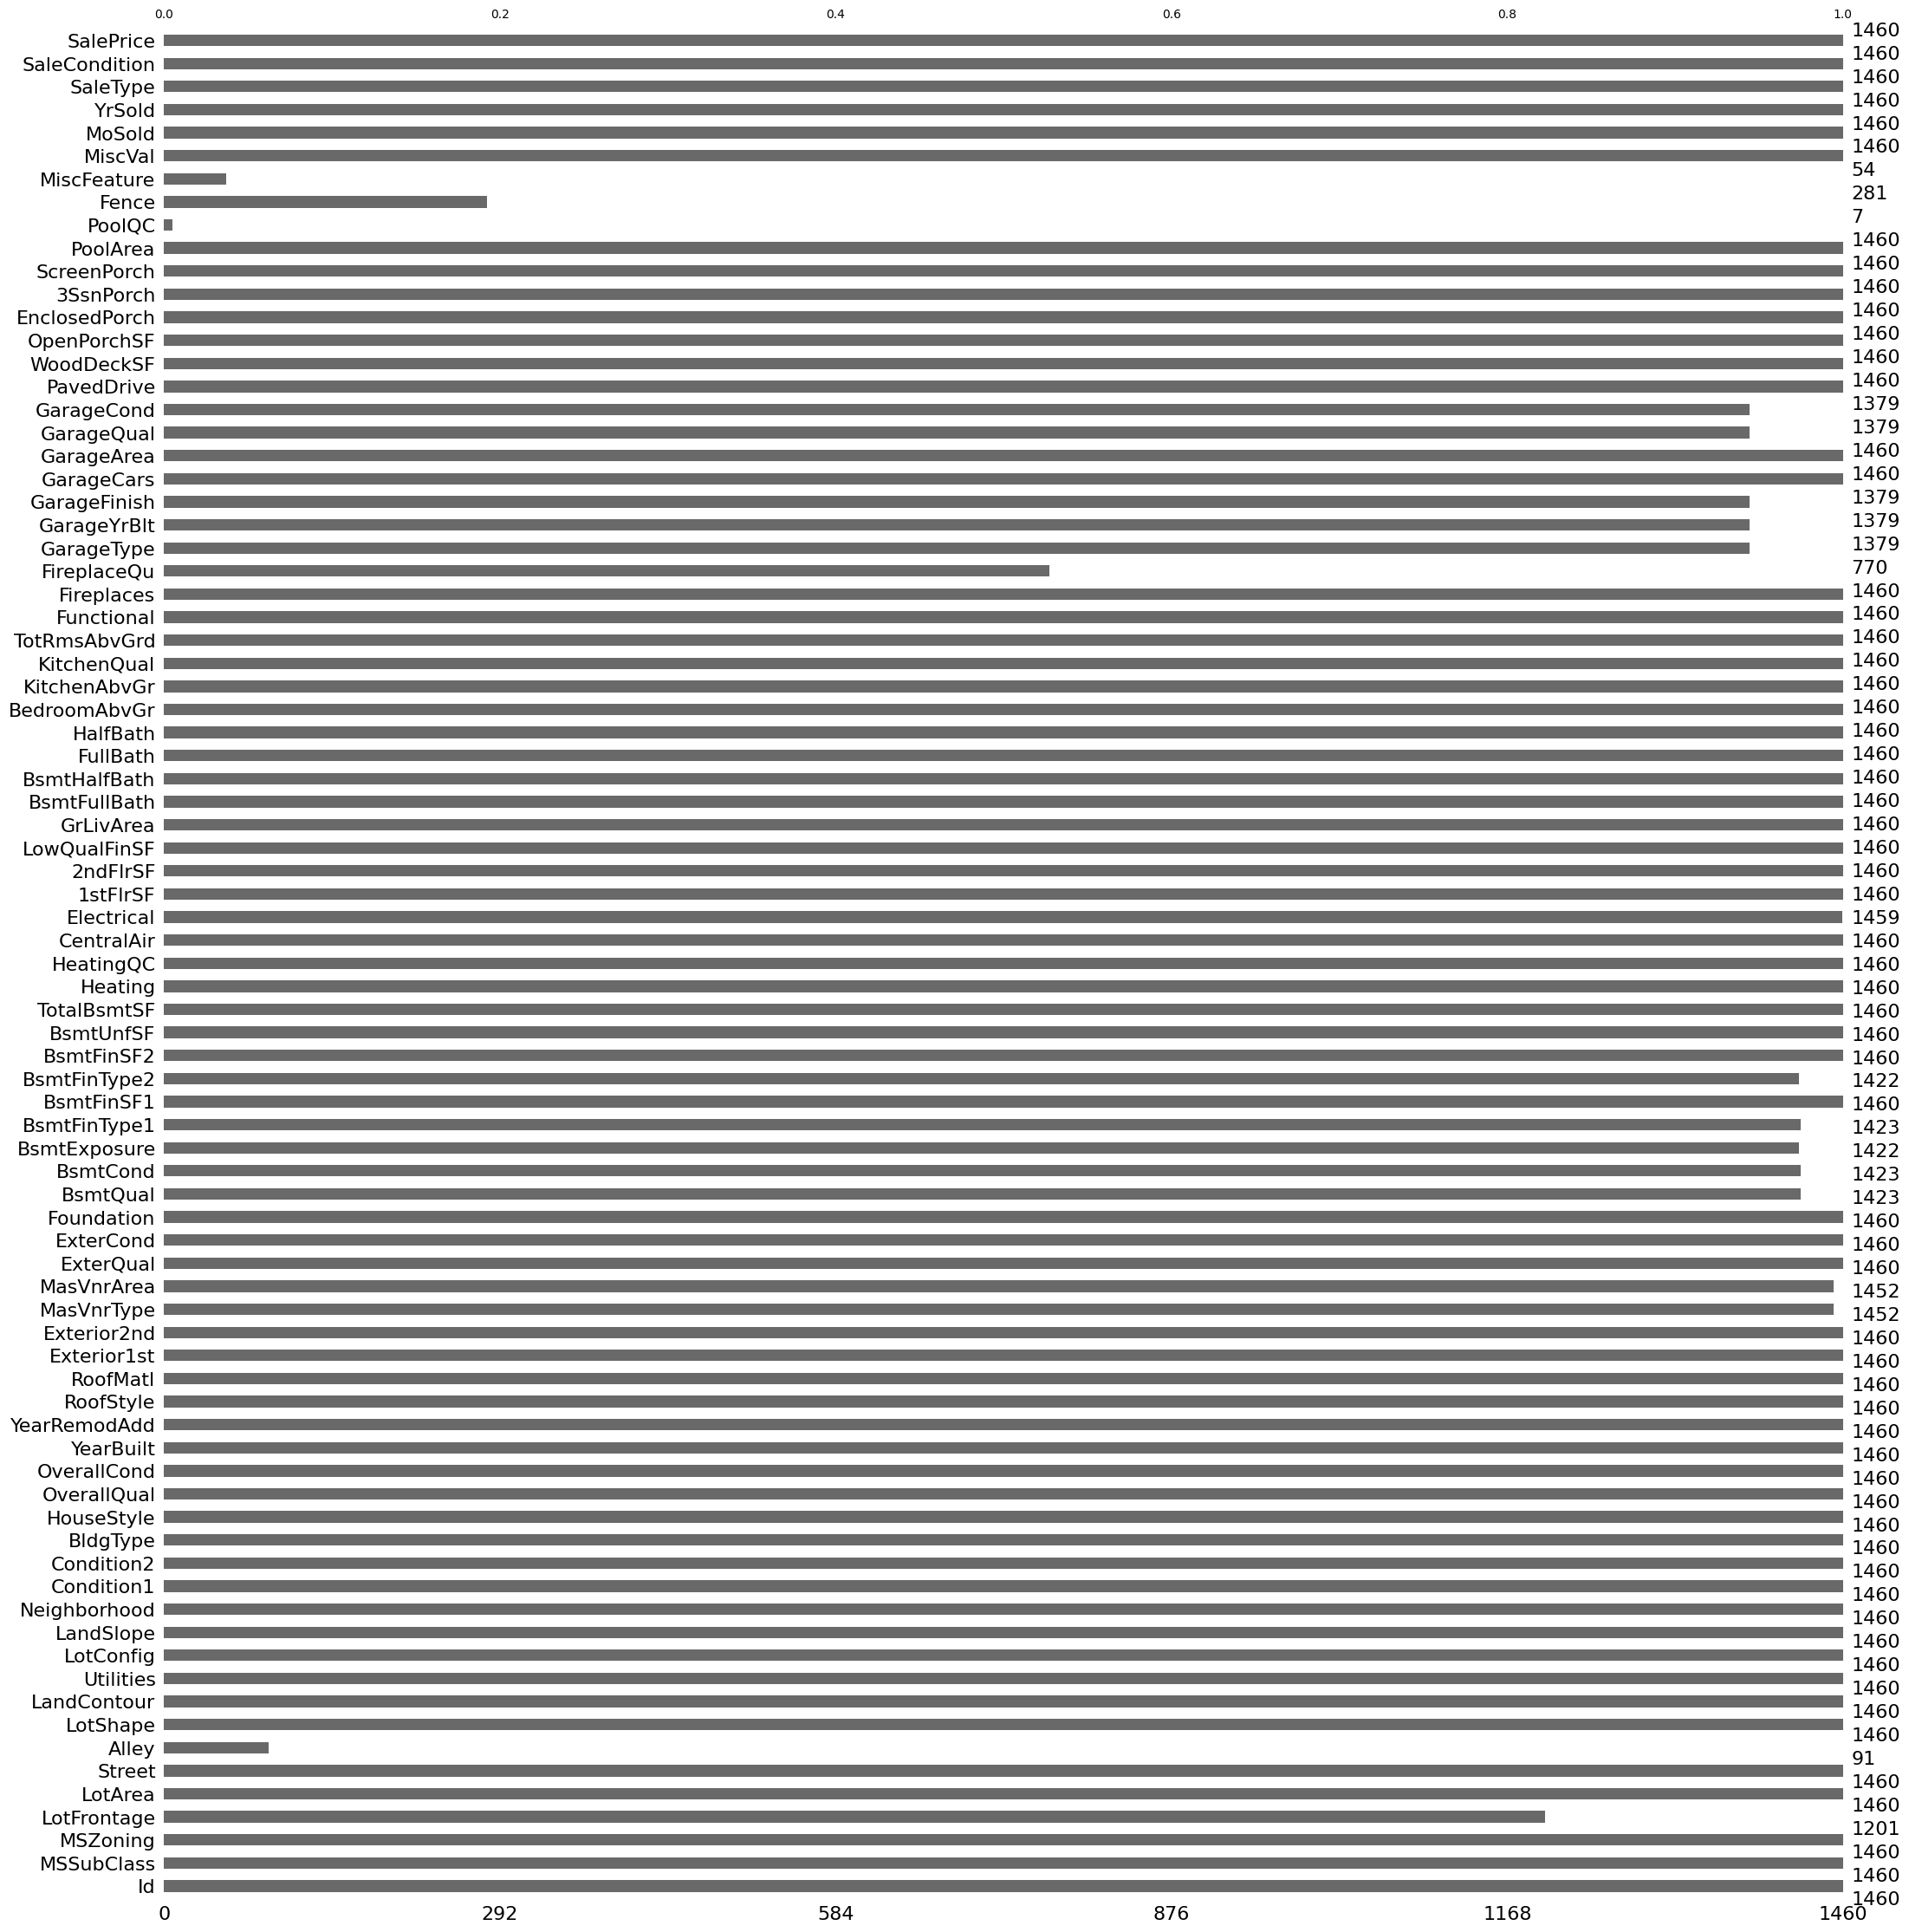

In [16]:
# 우측 숫자가 데이터의 개수, 결측치의 비율 확인 가능
import missingno as msno
msno.bar(data)

<Axes: >

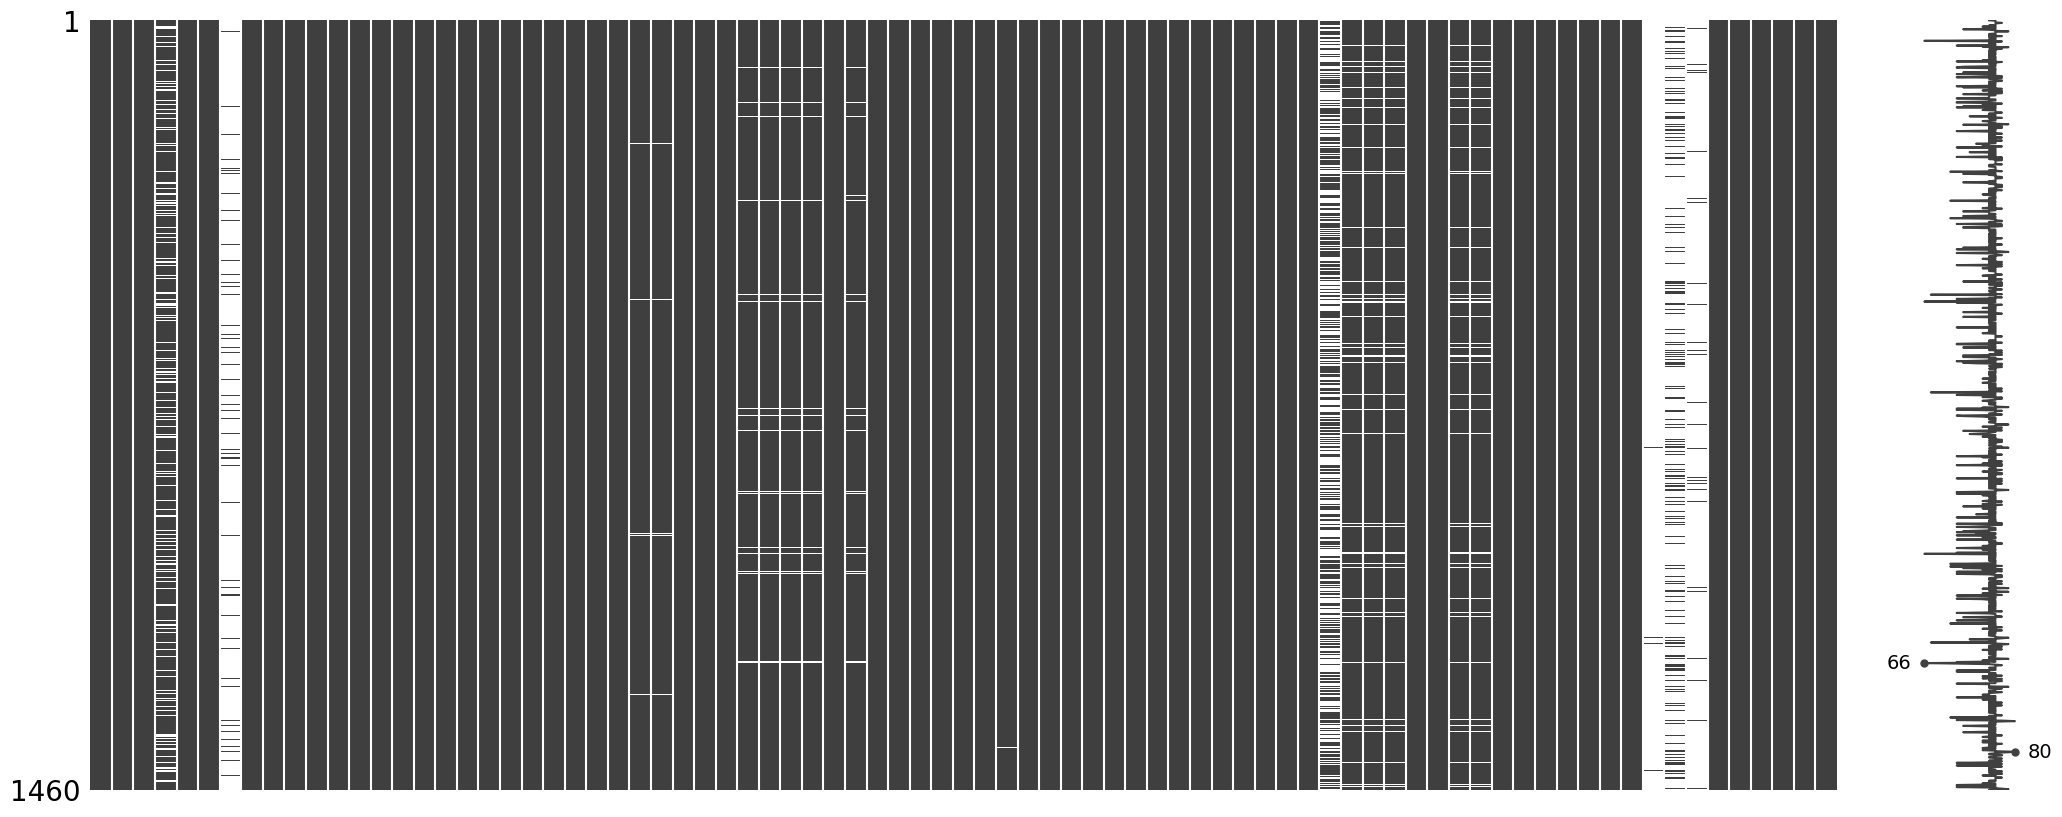

In [17]:
# 각 데이터별 변수별 결측치 존재 여부 (흰색이 결측치)
msno.matrix(data)

### 범주 값에 따른 SalePrice 분포

In [18]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Fireplaces  \
0          2003     Gable  CompShg     VinylSd     VinylSd  ...          0   
1          1976     Gable  CompShg     MetalSd     MetalSd  ...          1   
2          2002     Gable  CompShg     VinylSd     VinylSd  ...          1   
3          1970     Gable  CompShg   'Wd Sdng'   'Wd Shng'  ...          1   
4          2000     Gable  CompShg     VinylSd     VinylSd  ...          1   

   FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageArea  \
0          NaN     Attchd      2003.0          RFn          2        548   
1           TA     Attchd      1976.0          RFn          2        460   
2           TA     Attchd      2001.0          RFn          2        608   
3           Gd     Detchd      1998.0          Unf          3        642   
4           TA     Attchd      2000.0          RFn          3        836   

  GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA           Y          0           61              0   
1         TA         TA           Y        298            0              0   
2         TA         TA           Y          0           42              0   
3         TA         TA           Y          0           35            272   
4         TA         TA           Y        192           84              0   

   3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  MiscVal  MoSold  \
0          0           0        0    NaN   NaN          NaN        0       2   
1          0           0        0    NaN   NaN          NaN        0       5   
2          0           0        0    NaN   NaN          NaN        0       9   
3          0           0        0    NaN   NaN          NaN        0       2   
4          0           0        0    NaN   NaN          NaN        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 81 columns]

In [19]:
categoricals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
# SalePrice 값을 기준으로 데이터프레임을 가로로 펼쳐져있던 것을 세로로 길게 바꿔준다.
pd.melt(data, id_vars=['SalePrice'], value_vars=categoricals)

SalePrice       variable   value
0         208500       MSZoning      RL
1         181500       MSZoning      RL
2         223500       MSZoning      RL
3         140000       MSZoning      RL
4         250000       MSZoning      RL
...          ...            ...     ...
62775     175000  SaleCondition  Normal
62776     210000  SaleCondition  Normal
62777     266500  SaleCondition  Normal
62778     142125  SaleCondition  Normal
62779     147500  SaleCondition  Normal

[62780 rows x 3 columns]

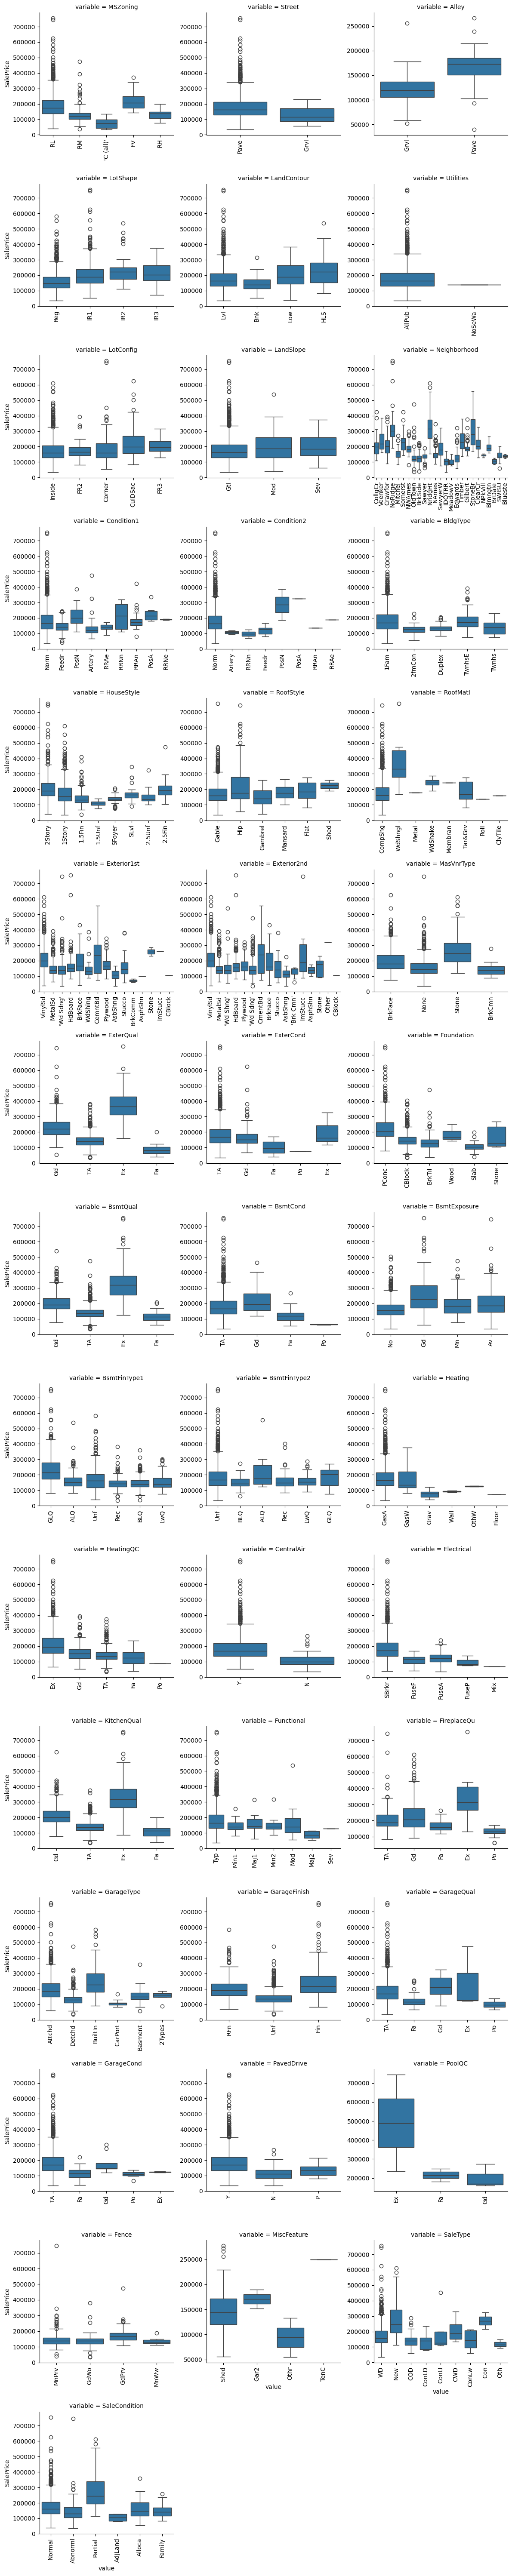

In [21]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(data, id_vars=['SalePrice'], value_vars=categoricals)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

###  수치형 변수를 구간으로 구분 (범주형 변수로 변환)

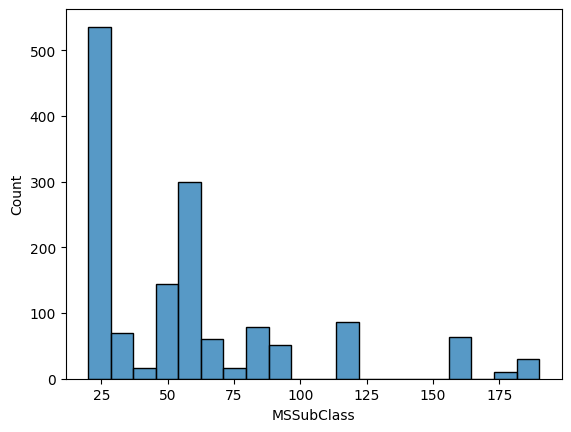

In [22]:
sns.histplot(x='MSSubClass', data=data);

In [23]:
q1, q3 = data['MSSubClass'].quantile([.25, .75])
print(q1, q3)

20.0 70.0


In [24]:
bottom = data['MSSubClass'].min() - (q3 - q1)
top = data['MSSubClass'].max() + (q3 - q1)
print(bottom, top)

-30.0 240.0


In [25]:
bins = [bottom, q1, q3, top]
labels = ['Low', 'Medium', 'High']
pd.cut(data['MSSubClass'], bins=bins, labels=labels)

0       Medium
1          Low
2       Medium
3       Medium
4       Medium
         ...  
1455    Medium
1456       Low
1457    Medium
1458       Low
1459       Low
Name: MSSubClass, Length: 1460, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [26]:
cut_train = data[numerics + ['SalePrice']]
cut_train.head(2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   

   SalePrice  
0     208500  
1     181500

In [27]:
cut_numerics = []
for col in numerics:
    try:
        q1, q3 = cut_train[col].quantile([.25, .75])
        bottom = cut_train[col].min() - (q3 - q1)
        top = cut_train[col].max() + (q3 - q1)

        bins = [bottom, q1, q3, top]
        labels = ['Low', 'Medium', 'High']
        cut_train[col] = pd.cut(cut_train[col], bins=bins, labels=labels)
        
        cut_numerics.append(col)
    except:
        cut_train = cut_train.drop(col, axis=1)
        print(f'{col} is deleted.')

cut_train.head(2)    

BsmtFinSF2 is deleted.
LowQualFinSF is deleted.
BsmtHalfBath is deleted.
KitchenAbvGr is deleted.
EnclosedPorch is deleted.
3SsnPorch is deleted.
ScreenPorch is deleted.
PoolArea is deleted.
MiscVal is deleted.


MSSubClass LotFrontage LotArea OverallQual OverallCond YearBuilt  \
0     Medium      Medium  Medium      Medium         Low      High   
1        Low      Medium  Medium      Medium        High    Medium   

  YearRemodAdd MasVnrArea BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF  \
0       Medium       High     Medium       Low      Medium      Low     High   
1       Medium        Low       High    Medium      Medium   Medium      Low   

  GrLivArea BsmtFullBath FullBath HalfBath BedroomAbvGr TotRmsAbvGrd  \
0    Medium       Medium   Medium   Medium       Medium         High   
1    Medium          Low   Medium      Low       Medium       Medium   

  Fireplaces GarageYrBlt GarageCars GarageArea WoodDeckSF OpenPorchSF MoSold  \
0        Low        High     Medium     Medium        Low      Medium    Low   
1     Medium      Medium     Medium     Medium       High         Low    Low   

   YrSold  SalePrice  
0  Medium     208500  
1     Low     181500

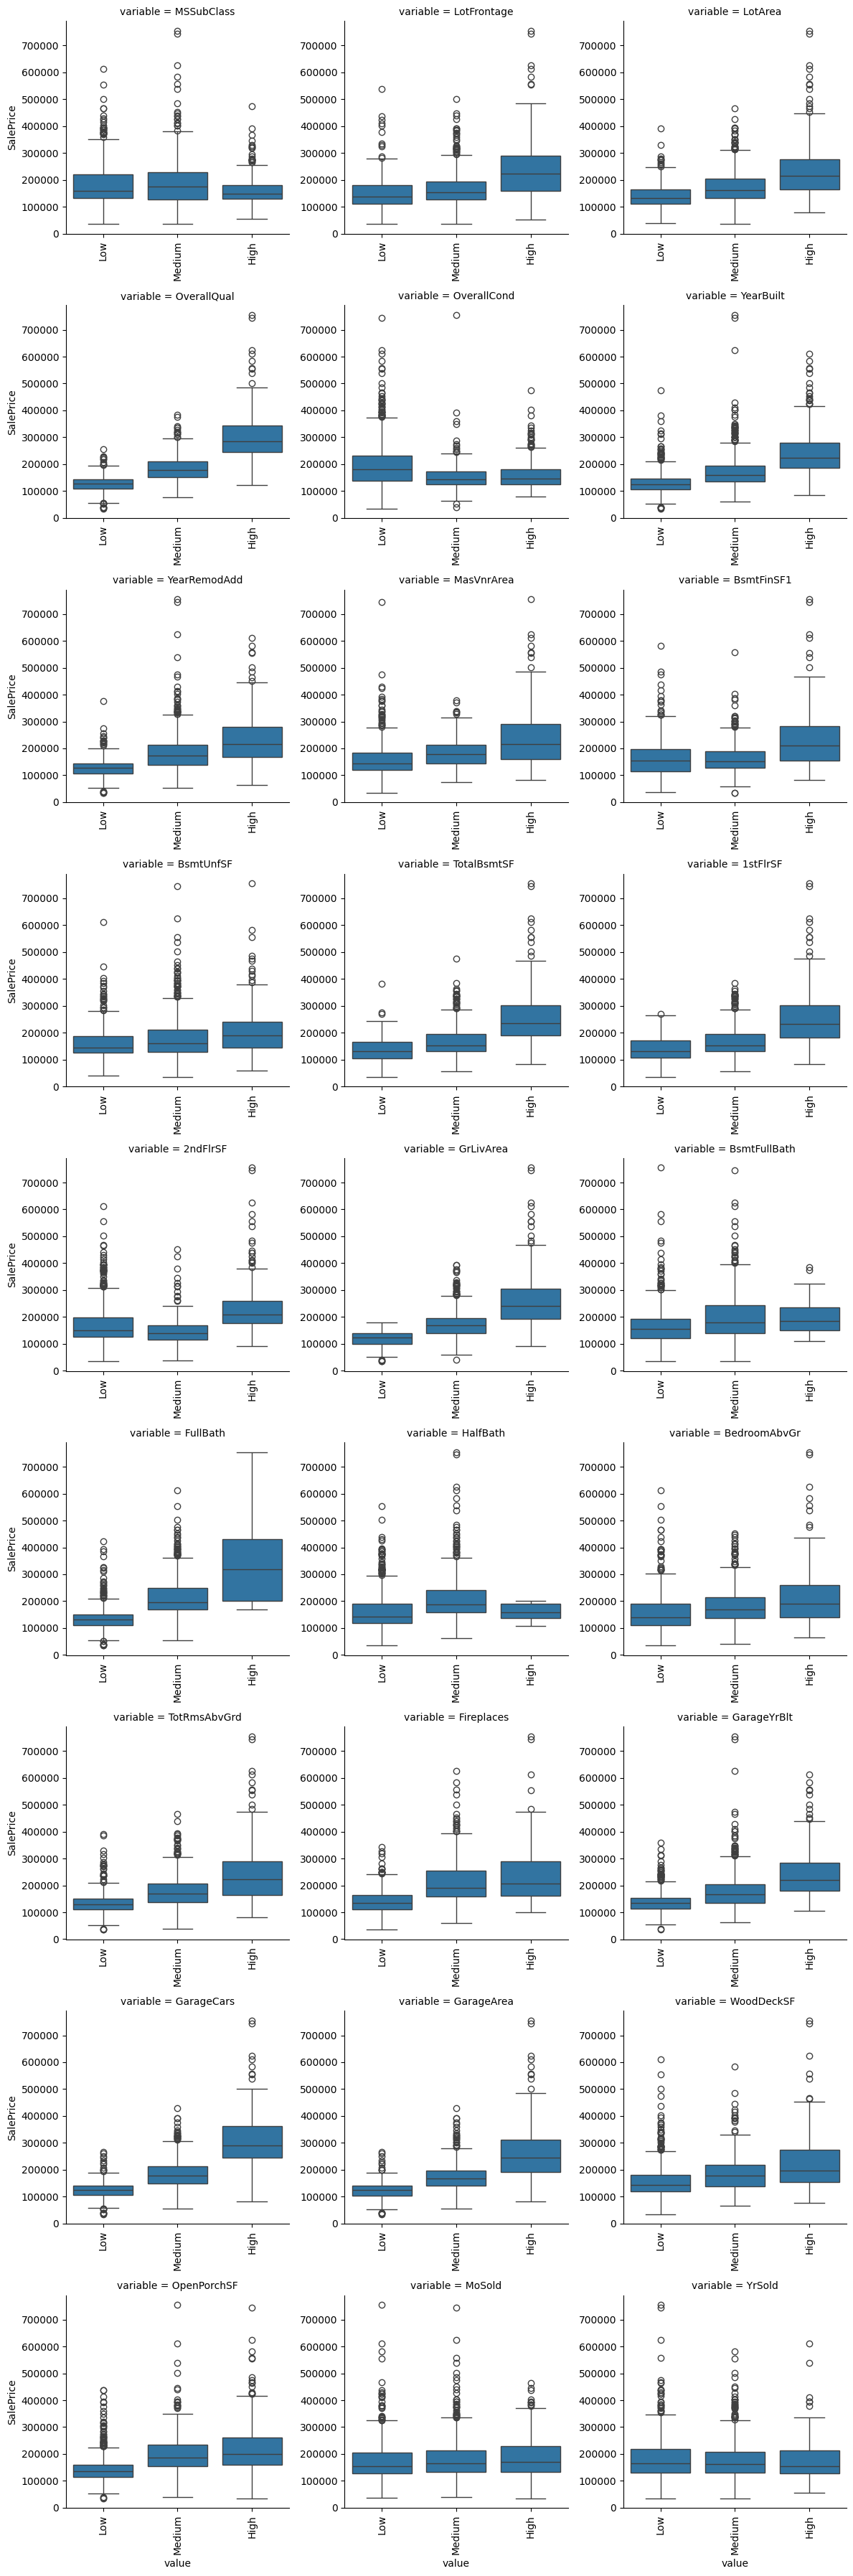

In [28]:
f = pd.melt(cut_train, id_vars=['SalePrice'], value_vars=cut_numerics)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(boxplot, "value", "SalePrice")

### 상관계수 분석

In [29]:
# 상관계수 행렬
data[numerics+['SalePrice']].corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

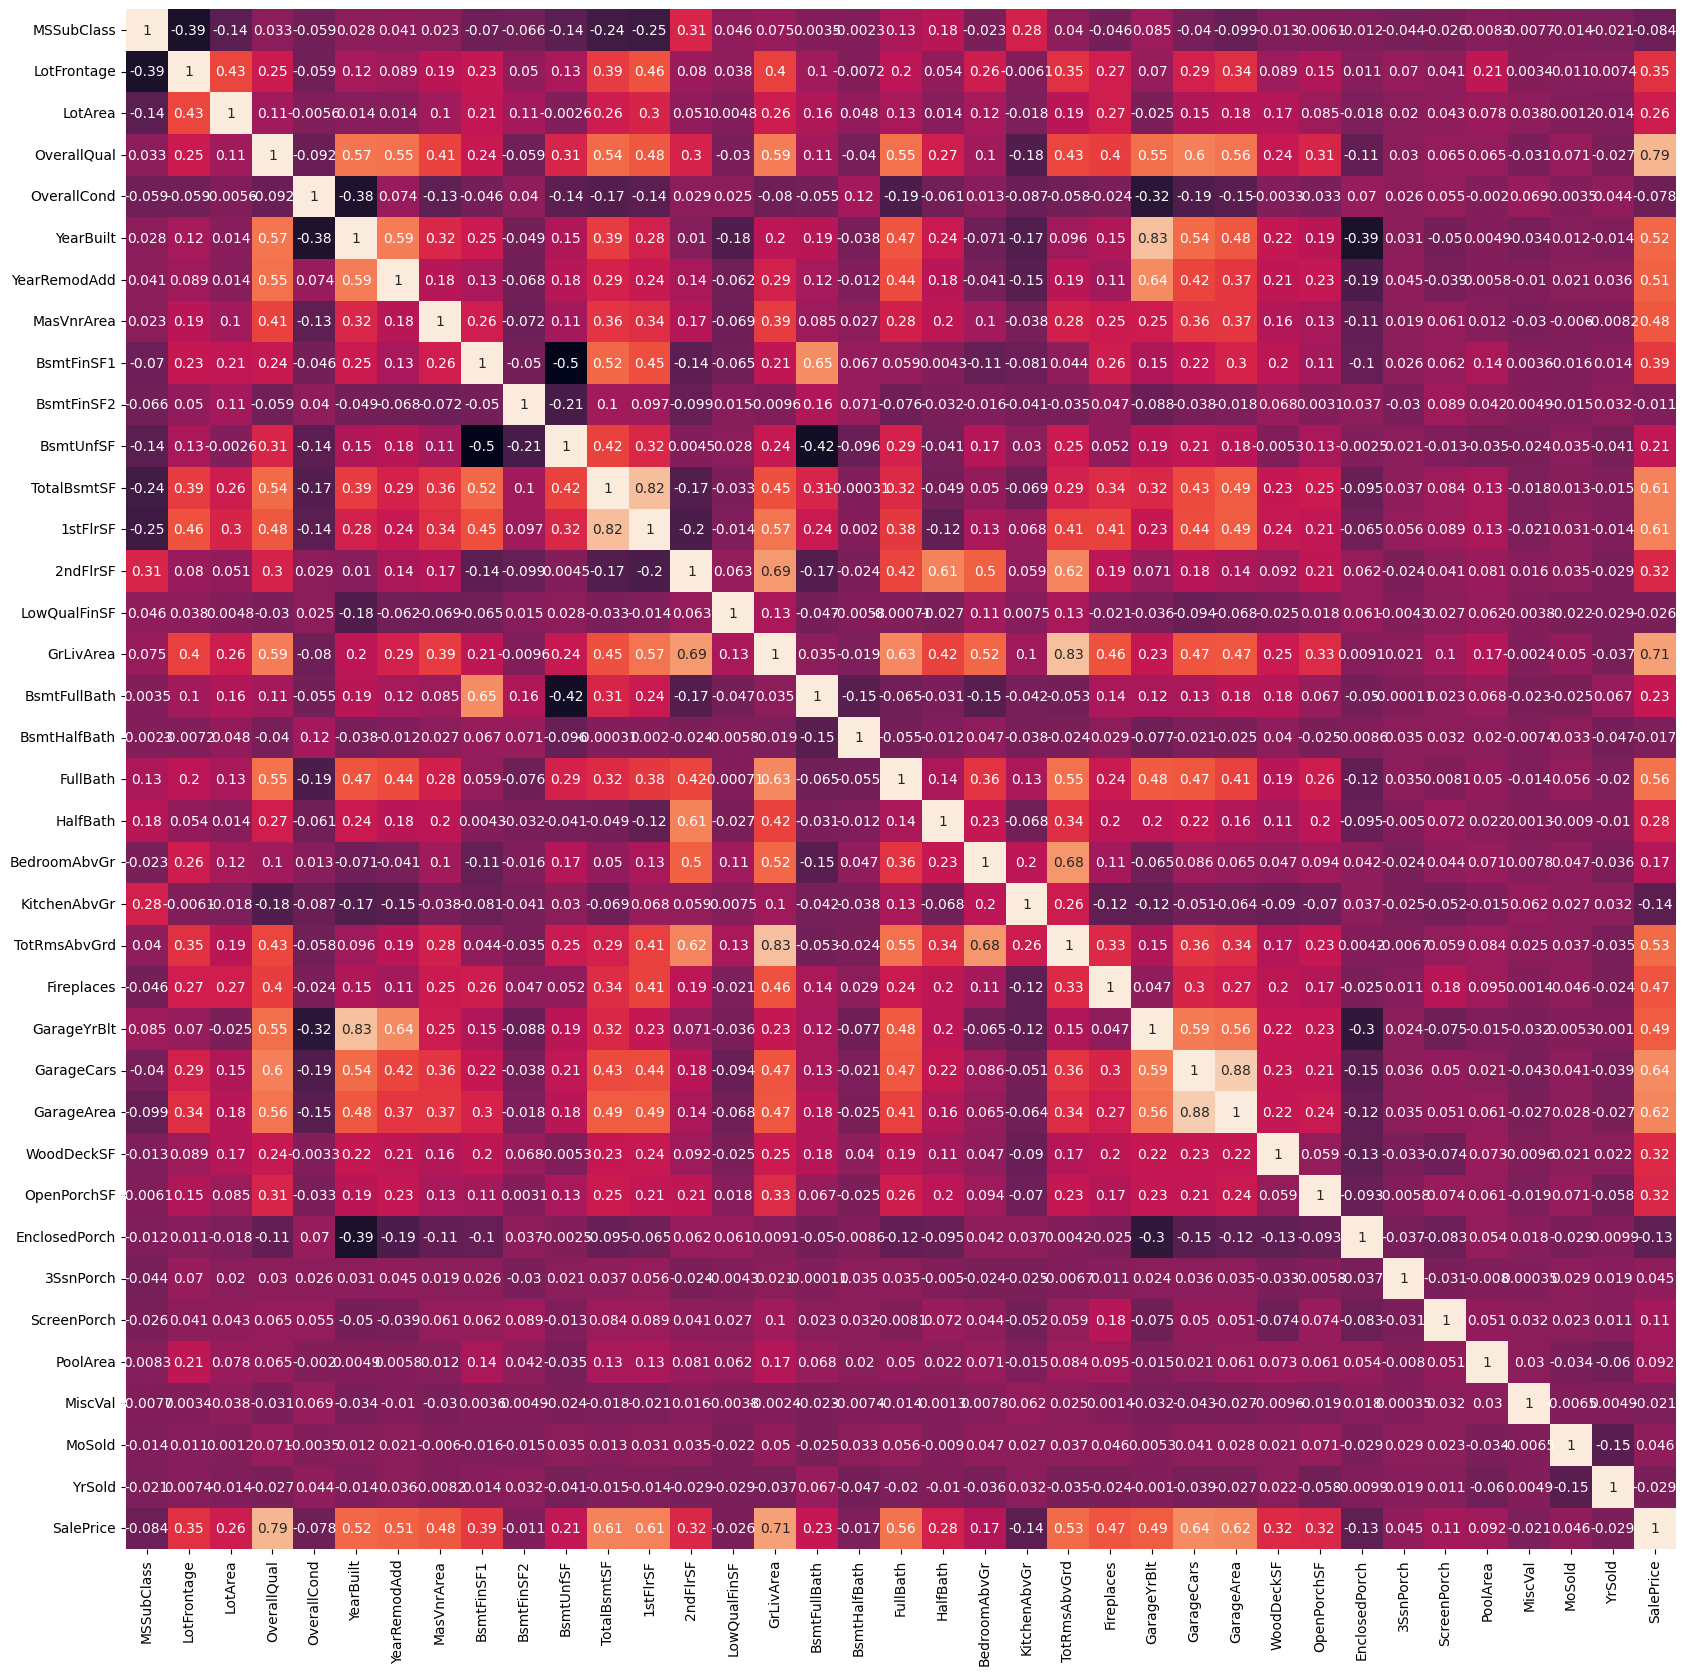

In [30]:
# 히트맵
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(data[numerics+['SalePrice']].corr(), annot=True, cbar=False);
plt.show()

In [31]:
data[numerics+['SalePrice']].corr().loc[:'YrSold', 'SalePrice'].abs().sort_values(ascending=False) # 상관계수 높은 순 정렬

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

- 데이터 상위 행 살펴보기

In [32]:
data = housing['frame']
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  ... Fireplaces  \
0          2003     Gable  CompShg     VinylSd     VinylSd  ...          0   
1          1976     Gable  CompShg     MetalSd     MetalSd  ...          1   
2          2002     Gable  CompShg     VinylSd     VinylSd  ...          1   
3          1970     Gable  CompShg   'Wd Sdng'   'Wd Shng'  ...          1   
4          2000     Gable  CompShg     VinylSd     VinylSd  ...          1   

   FireplaceQu GarageType GarageYrBlt GarageFinish GarageCars GarageArea  \
0          NaN     Attchd      2003.0          RFn          2        548   
1           TA     Attchd      1976.0          RFn          2        460   
2           TA     Attchd      2001.0          RFn          2        608   
3           Gd     Detchd      1998.0          Unf          3        642   
4           TA     Attchd      2000.0          RFn          3        836   

  GarageQual GarageCond  PavedDrive WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA           Y          0           61              0   
1         TA         TA           Y        298            0              0   
2         TA         TA           Y          0           42              0   
3         TA         TA           Y          0           35            272   
4         TA         TA           Y        192           84              0   

   3SsnPorch ScreenPorch PoolArea PoolQC Fence  MiscFeature  MiscVal  MoSold  \
0          0           0        0    NaN   NaN          NaN        0       2   
1          0           0        0    NaN   NaN          NaN        0       5   
2          0           0        0    NaN   NaN          NaN        0       9   
3          0           0        0    NaN   NaN          NaN        0       2   
4          0           0        0    NaN   NaN          NaN        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 81 columns]